# Compositional vs non-compositional embeddings


In [1]:
import os
import torch
from utils.data_processing import *
from utils.statistic_tests import *
from utils.vizualization import *

os.environ['CUDA_VISIBLE_DEVICES'] = "1"
torch.cuda.is_available()

DEVICE = "cuda"
%load_ext autoreload
%autoreload 2

In [6]:
model = bert_model
tokenizer = bert_tokenizer

In [3]:
# Preprocessing 
data_df = retrieve_preprocessed_df("../data/en_TaskIndependentData.json",print_ignored=True) 
data_df.head(10)

We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
Only MWEs that are tokenized like row['mwe'].split() have been retrieved at this step.      Specifically, we kept MWEs split into 2 tokens, in the singular form, and no different form from the MWE string ('running' != 'run').      To see the ignored rows, set print_ignored=True.
21 rows dropped where MWE not found as sublist in sentence.
There are 1,941 remaining sentences in the dataset.


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,after,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe,normalized_sentence_tokens
0,38,sacred cow,divine cow,above criticism,None,None,1,divine cow,"Like beef, pork is also forbidden in Hinduism.","However, unlike the sacred cow, the pig repres...",This is considered to be particularly impure a...,"[like, beef, ,, pork, is, also, forbidden, in,...","[however, ,, unlike, the, sacred, cow, ,, the,...","[this, is, considered, to, be, particularly, i...","[sacred, cow]","[however, ,, unlike, the, sacred, cow, ,, the,..."
1,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"Besides, the Rights group said the Minister of...",The Rights group said the ministry has continu...,HURIWA recalled that the Federal Government on...,"[besides, ,, the, rights, group, said, the, mi...","[the, rights, group, said, the, ministry, has,...","[hu, ##ri, ##wa, recalled, that, the, federal,...","[sacred, cow]","[the, rights, group, said, the, ministry, has,..."
2,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"But in the Macquarie judgment, Judge Sandy Str...",Barwick says historically there has been littl...,The Fair Work Act is clear that employers cann...,"[but, in, the, macquarie, judgment, ,, judge, ...","[bar, ##wick, says, historically, there, has, ...","[the, fair, work, act, is, clear, that, employ...","[sacred, cow]","[bar, wick, says, historically, there, has, be..."
3,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"The Commissioner of Police, CP Abutu Yaro, who...",The state police boss also directed the full e...,No stone would be left unturned because we are...,"[the, commissioner, of, police, ,, cp, abu, ##...","[the, state, police, boss, also, directed, the...","[no, stone, would, be, left, un, ##turn, ##ed,...","[sacred, cow]","[the, state, police, boss, also, directed, the..."
4,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,The committee shall come up with findings and ...,There is no sacred cow under the law of probit...,"For a deterrent in future, the Chairman shall ...","[the, committee, shall, come, up, with, findin...","[there, is, no, sacred, cow, under, the, law, ...","[for, a, deter, ##rent, in, future, ,, the, ch...","[sacred, cow]","[there, is, no, sacred, cow, under, the, law, ..."
5,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,The House has now resumed discussion on a moti...,"Taking floor of the House, Senator Mohsin Aziz...",He said he presented himself before National A...,"[the, house, has, now, resumed, discussion, on...","[taking, floor, of, the, house, ,, senator, mo...","[he, said, he, presented, himself, before, nat...","[sacred, cow]","[taking, floor, of, the, house, ,, senator, mo..."
6,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,We will deal with perpetrators with the force ...,"Going further with seriousness, Ajimobi went o...",Anyone who is implicated in the endemic and se...,"[we, will, deal, with, perpetrators, with, the...","[going, further, with, seriousness, ,, aj, ##i...","[anyone, who, is, implicated, in, the, endemic...","[sacred, cow]","[going, further, with, seriousness, ,, aj, imo..."
7,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,The end was that nobody should be denied healt...,By making a sacred cow of the latter we have b...,An anonymous nurse working in intensive care s...,"[the, end, was, that, nobody, should, be, deni...","[by, making, a, sacred, cow, of, the, latter, ...","[an, anonymous, nurse, working, in, intensive,...","[sacred, cow]","[by, making, a, sacred, cow, of, the, latter, ..."
8,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"Although, the motion against NAB was talked ou...","No one is sacred cow, no one is above accounta...",It’s true that when NAB summoned me I was in R...,"[although, ,, the, motion, against, na, ##b, w...","

In [5]:
mwe = "silver spoon"
# create mwe_df with only these occurrences
mwe_df = data_df[data_df['mwe'] == 'silver spoon'].copy()
mwe_df.head()

,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,after,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe
382,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,A SILVER spoon declared treasure trove has bee...,The British Museum has agreed to loan the silv...,Volunteers found the spoon in the house's roof...,"[a, silver, spoon, declared, treasure, tr, ##o...","[the, british, museum, has, agreed, to, loan, ...","[volunteers, found, the, spoon, in, the, house...","[silver, spoon]"
383,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"As the building was deconstructed, Robin set a...",He pulled what he thought was just another iro...,"Museum chairman Philip Holt said: ""We are thri...","[as, the, building, was, deco, ##nst, ##ru, ##...","[he, pulled, what, he, thought, was, just, ano...","[museum, chairman, philip, holt, said, :, "", w...","[silver, spoon]"
384,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"Treble hooks are better with the dough baits.""","Shawn Kinney, who is the local biologist manag...",He also said 300 pounds of the trout were stoc...,"[tre, ##ble, hooks, are, better, with, the, do...","[shawn, kin, ##ney, ,, who, is, the, local, bi...","[he, also, said, 300, pounds, of, the, trout, ...","[silver, spoon]"
385,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,So many of our stories relate to the extraordi...,The silver spoon will be on display in the mus...,"For details, phone 01751 417367 or go to ryeda...","[so, many, of, our, stories, relate, to, the, ...","[the, silver, spoon, will, be, on, display, in...","[for, details, ,, phone, 01, ##75, ##1, 417, #...","[silver, spoon]"
386,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,Its origins probably date to the 16th century.,"Robin Butler, who found the silver spoon, is s...","Now in his 80s, Robin was involved in helping ...","[its, origins, probably, date, to, the, 16th, ...","[robin, butler, ,, who, found, the, silver, sp...","[now, in, his, 80s, ,, robin, was, involved, i...","[silver, spoon]"


In [6]:
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=12, normalize=True, print_ignored=True)
mwe_df.head()

[MWE embedding extraction] There are 0 ignored examples.


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start
0,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,A SILVER spoon declared treasure trove has bee...,The British Museum has agreed to loan the silv...,...,"[a, silver, spoon, declared, treasure, tr, ##o...","[the, british, museum, has, agreed, to, loan, ...","[volunteers, found, the, spoon, in, the, house...","[silver, spoon]","[[0.018654268, 0.6910873, 0.2026695, 0.4775019...","[[-0.37713924, 0.030672973, 0.20784926, 0.3602...","[[1.2411865, 1.4053898, 1.2789695, -0.7488121,...","[[0.1865374, 0.83510077, -0.11550366, 0.773410...",None,8
1,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"As the building was deconstructed, Robin set a...",He pulled what he thought was just another iro...,...,"[as, the, building, was, deco, ##nst, ##ru, ##...","[he, pulled, what, he, thought, was, just, ano...","[museum, chairman, philip, holt, said, :, "", w...","[silver, spoon]","[[0.337791, -0.7703196, -0.8893496, 0.9594917,...","[[-0.25725606, 0.5827976, -0.92571783, 0.41141...","[[-0.028462637, 0.49278638, 1.7692301, 0.34238...","[[-0.4558201, -0.11605784, 0.6724338, 1.300790...",None,20
2,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"Treble hooks are better with the dough baits.""","Shawn Kinney, who is the local biologist manag...",...,"[tre, ##ble, hooks, are, better, with, the, do...","[shawn, kin, ##ney, ,, who, is, the, local, bi...","[he, also, said, 300, pounds, of, the, trout, ...","[silver, spoon]","[[0.49236047, -1.185526, 0.29980478, 0.4184033...","[[0.082632124, 0.003398143, -0.92742443, -0.94...","[[0.2351108, 0.13243183, -0.2664389, -0.215132...","[[0.030983385, 1.8478101, -0.079767086, 0.6688...",None,31
3,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,So many of our stories relate to the extraordi...,The silver spoon will be on display in the mus...,...,"[so, many, of, our, stories, relate, to, the, ...","[the, silver, spoon, will, be, on, display, in...","[for, details, ,, phone, 01, ##75, ##1, 417, #...","[silver, spoon]","[[0.4317955, -1.7990297, 1.8700525, -0.6350570...","[[0.19751608, -0.5685676, -0.17844857, 1.06055...","[[1.4217685, -0.999623, 2.7332156, -0.97409415...","[[0.98915505, -0.7381759, 1.045079, 1.8857881,...",None,1
4,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,Its origins probably date to the 16th century.,"Robin Butler, who found the silver spoon, is s...",...,"[its, origins, probably, date, to, the, 16th, ...","[robin, butler, ,, who, found, the, silver, sp...","[now, in, his, 80s, ,, robin, was, involved, i...","[silver, spoon]","[[0.79174757, -0.8585021, 0.08173233, 0.688476...","[[2.3531456, -0.73864514, 0.0059185238, -1.644...","[[-0.21136138, -0.36094984, 2.0604339, -1.5370...","[[0.13738604, -0.08251645, 0.14455894, 0.09436...",None,6


In [8]:
mwe_df["combined_embed"] = mwe_df.apply(lambda row: 
                                       combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else
                                       combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else
                                       None, axis=1)

mwe_df.head()


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,sentence_tokens,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start,combined_embed
0,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,A SILVER spoon declared treasure trove has bee...,The British Museum has agreed to loan the silv...,...,"[the, british, museum, has, agreed, to, loan, ...","[volunteers, found, the, spoon, in, the, house...","[silver, spoon]","[[0.018654268, 0.6910873, 0.2026695, 0.4775019...","[[-0.37713924, 0.030672973, 0.20784926, 0.3602...","[[1.2411865, 1.4053898, 1.2789695, -0.7488121,...","[[0.1865374, 0.83510077, -0.11550366, 0.773410...",None,8,"[0.1865374, 0.83510077, -0.11550366, 0.7734101..."
1,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"As the building was deconstructed, Robin set a...",He pulled what he thought was just another iro...,...,"[he, pulled, what, he, thought, was, just, ano...","[museum, chairman, philip, holt, said, :, "", w...","[silver, spoon]","[[0.337791, -0.7703196, -0.8893496, 0.9594917,...","[[-0.25725606, 0.5827976, -0.92571783, 0.41141...","[[-0.028462637, 0.49278638, 1.7692301, 0.34238...","[[-0.4558201, -0.11605784, 0.6724338, 1.300790...",None,20,"[-0.4558201, -0.11605784, 0.6724338, 1.3007903..."
2,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,"Treble hooks are better with the dough baits.""","Shawn Kinney, who is the local biologist manag...",...,"[shawn, kin, ##ney, ,, who, is, the, local, bi...","[he, also, said, 300, pounds, of, the, trout, ...","[silver, spoon]","[[0.49236047, -1.185526, 0.29980478, 0.4184033...","[[0.082632124, 0.003398143, -0.92742443, -0.94...","[[0.2351108, 0.13243183, -0.2664389, -0.215132...","[[0.030983385, 1.8478101, -0.079767086, 0.6688...",None,31,"[0.030983385, 1.8478101, -0.079767086, 0.66886..."
3,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,So many of our stories relate to the extraordi...,The silver spoon will be on display in the mus...,...,"[the, silver, spoon, will, be, on, display, in...","[for, details, ,, phone, 01, ##75, ##1, 417, #...","[silver, spoon]","[[0.4317955, -1.7990297, 1.8700525, -0.6350570...","[[0.19751608, -0.5685676, -0.17844857, 1.06055...","[[1.4217685, -0.999623, 2.7332156, -0.97409415...","[[0.98915505, -0.7381759, 1.045079, 1.8857881,...",None,1,"[0.98915505, -0.7381759, 1.045079, 1.8857881, ..."
4,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,Its origins probably date to the 16th century.,"Robin Butler, who found the silver spoon, is s...",...,"[robin, butler, ,, who, found, the, silver, sp...","[now, in, his, 80s, ,, robin, was, involved, i...","[silver, spoon]","[[0.79174757, -0.8585021, 0.08173233, 0.688476...","[[2.3531456, -0.73864514, 0.0059185238, -1.644...","[[-0.21136138, -0.36094984, 2.0604339, -1.5370...","[[0.13738604, -0.08251645, 0.14455894, 0.09436...",None,6,"[0.13738604, -0.08251645, 0.14455894, 0.094362..."


In [15]:
mwe_df = data_df[data_df['mwe'] == 'big fish'].copy() 
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=12, normalize=True, print_ignored=True)
mwe_df

[MWE embedding extraction] There are 0 ignored examples.


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start
0,264,big fish,large fish,important person,None,None,0,important person,"Instead, Filipinos lost faith in government in...","So far, there is no big fish linked to the den...",...,"[instead, ,, filipino, ##s, lost, faith, in, g...","[so, far, ,, there, is, no, big, fish, linked,...","[no, one, has, really, paid, the, price, .]","[big, fish]","[[0.5252596, -0.7914031, -0.18967167, 0.288816...","[[-0.6924678, -0.18755506, 1.1525224, -1.53435...","[[-0.5324047, -0.28860238, -0.12782536, -0.644...",None,"[[1.2623811, -0.74088705, -0.33396372, 0.02598...",6
1,264,big fish,large fish,important person,None,None,0,important person,The fish the New York Islanders could catch at...,The pending UFA list lacks big fish players on...,...,"[the, fish, the, new, york, islanders, could, ...","[the, pending, u, ##fa, list, lacks, big, fish...","[the, only, significant, u, ##fa, that, could,...","[big, fish]","[[0.039422166, -0.7426333, 0.011527036, 1.1959...","[[-1.1689925, -0.22760825, 0.8657018, 1.611415...","[[-1.7706035, -1.2933322, 0.018611081, 0.65500...",None,"[[-0.5726644, -0.38567477, 0.25894082, 1.14603...",6
2,264,big fish,large fish,important person,None,None,1,large fish,"What's really special about this event, not on...","We got single moms with their sons, we got gra...",...,"[what, ', s, really, special, about, this, eve...","[we, got, single, mom, ##s, with, their, sons,...","[copyright, 2021, ne, ##x, ##star, inc, ., all...","[big, fish]","[[0.101679176, -1.3658165, 0.9356346, -0.64789...","[[0.25944355, -0.6463774, 0.0174328, 0.5740531...","[[1.9278586, 1.3984947, 0.5465351, -0.7002119,...","[[-0.9704986, -0.8307229, -0.039892763, 0.3578...",None,41
3,264,big fish,large fish,important person,None,None,1,large fish,If you're one of those who'd rather just stay ...,"That doesn't mean, however, that we're not int...",...,"[if, you, ', re, one, of, those, who, ', d, ra...","[that, doesn, ', t, mean, ,, however, ,, that,...","[you, don, ', t, have, to, win, an, ice, fishi...","[big, fish]","[[0.6549128, -1.2263538, -0.16082877, 0.823540...","[[-1.1650032, 0.13230057, -0.9194416, -1.08234...","[[1.1678083, -1.0293968, -0.2623144, 0.5590003...","[[0.39624345, 0.62294906, -0.46439236, 0.53322...",None,16
4,264,big fish,large fish,important person,None,None,1,large fish,Change is the only thing that is constant.,"We had our picturesque winter sunsets, big fis...",...,"[change, is, the, only, thing, that, is, const...","[we, had, our, picturesque, winter, sunset, ##...","[there, was, no, other, place, in, the, world,...","[big, fish]","[[-0.14699288, 0.37686867, 0.38013545, 0.68114...","[[1.2278174, 0.34978366, 1.4934889, 1.4448588,...","[[0.55263805, -0.7536966, 0.125195, -0.0683696...","[[0.7663354, 0.90369356, 0.39211196, 0.4445, -...",None,8
5,264,big fish,large fish,important person,None,None,1,large fish,"We've got people coming from Minnesota, Iowa, ...",They're chasing big fish and one lunker of a p...,...,"[we, ', ve, got, people, coming, from, minneso...","[they, ', re, chasing, big, fish, and, one, lu...","[this, year, we, ', re, giving, away, a, $, 5,...","[big, fish]","[[1.1261867, 0.07701016, -0.31480476, 0.399516...","[[1.0463265, 0.7627346, 0.86289316, -0.583237,...","[[-1.8857784, -0.40283322, 1.0083426, 0.131284...","[[0.5241554, -0.102912284, 0.7340724, 0.076112...",None,4
6,264,big fish,large fish,important person,None,None,1,large fish,God used a pretty big powerful wake up call on...,It isn’t every day that we hear of someone bei...,...,"[god, used, a, pretty, big, powerful, wake, up...","[it, isn, ’, t, every, day, that, we, hear, of...","[but, for, god, all, things, are, possible, ,,...","[big, fish]","[[0.7691306, 0.8602075, 0.008021892, 0.3089854...","[[0.54713076, 0.61668634, -0.197491

In [4]:
selected_pairs, pair_info = create_literal_idiomatic_pairs(data_df, unique_occurrences=False)
pair_df = get_pair_info_df(pair_info)
pair_df['difference'] = pair_df.apply(lambda row: compute_difference(row, 'literal', 'idiomatic'), axis=1)
pair_df['most_represented'] = pair_df.apply(get_most_represented, axis=1)
pair_df.sort_values(by=['literal','idiomatic'], ascending=False) 

mwe,literal,idiomatic,difference,most_represented
ground floor,19,5,14,literal
baby blues,17,3,14,literal
ancient history,15,7,8,literal
gold mine,13,3,10,literal
best man,10,10,0,equal
brass ring,9,17,8,idiomatic
bad hat,9,8,1,literal
brick wall,9,8,1,literal
silver spoon,8,5,3,literal
cutting edge,7,11,4,idiomatic


### Multiple layers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

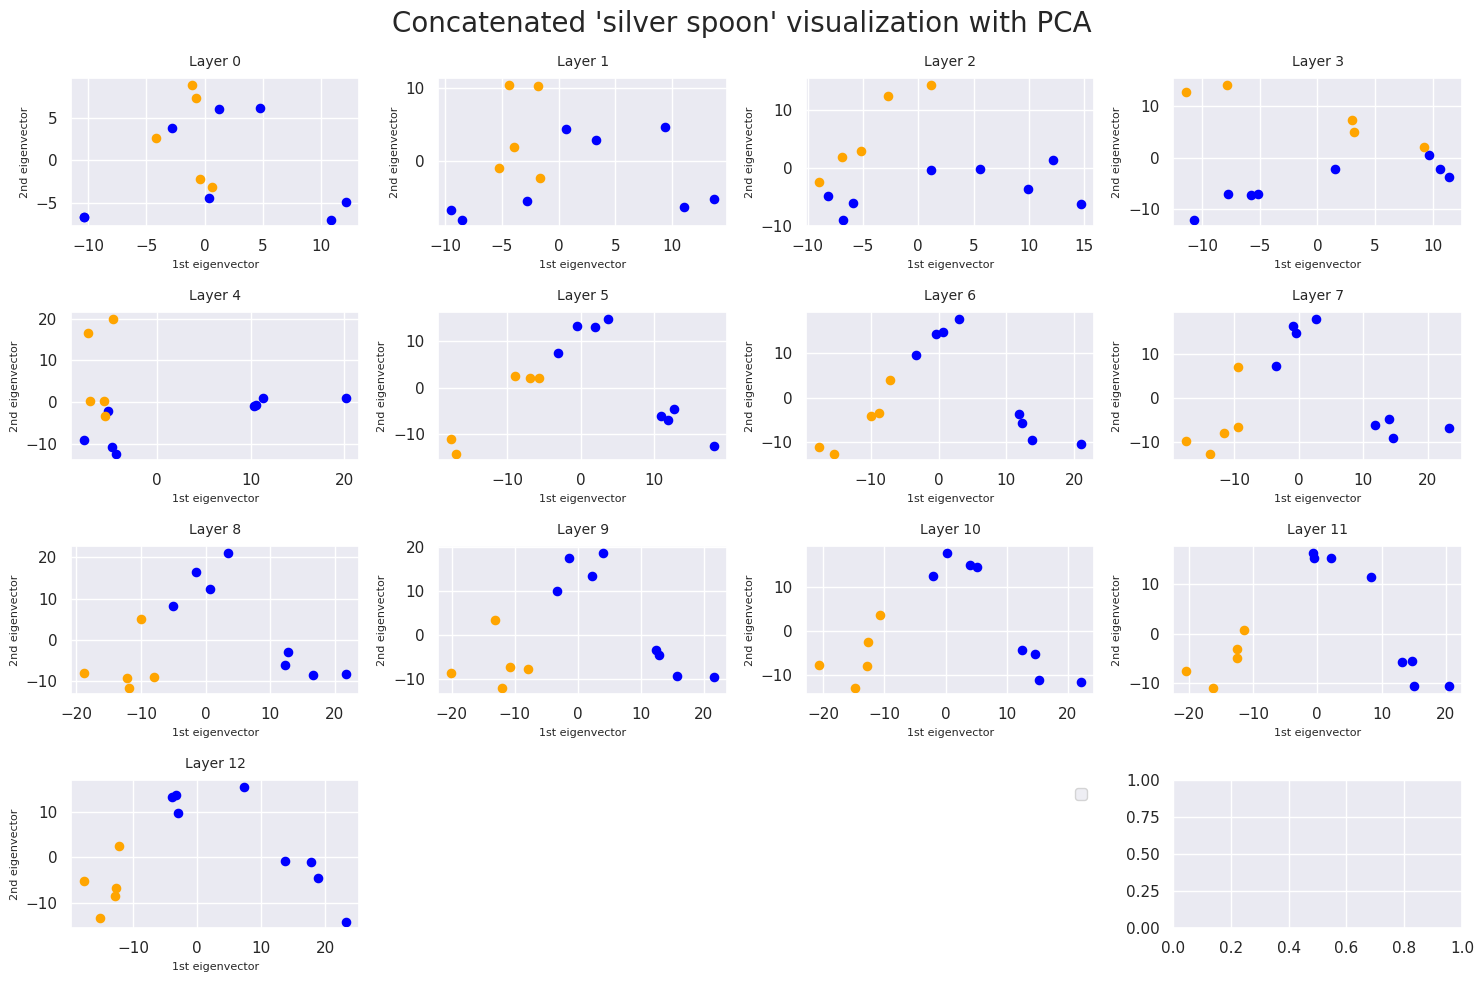

In [ ]:
mwe= "silver spoon"
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_mwe(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, combination_type="concatenation", plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"Concatenated '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/Concatenated '{mwe}' visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

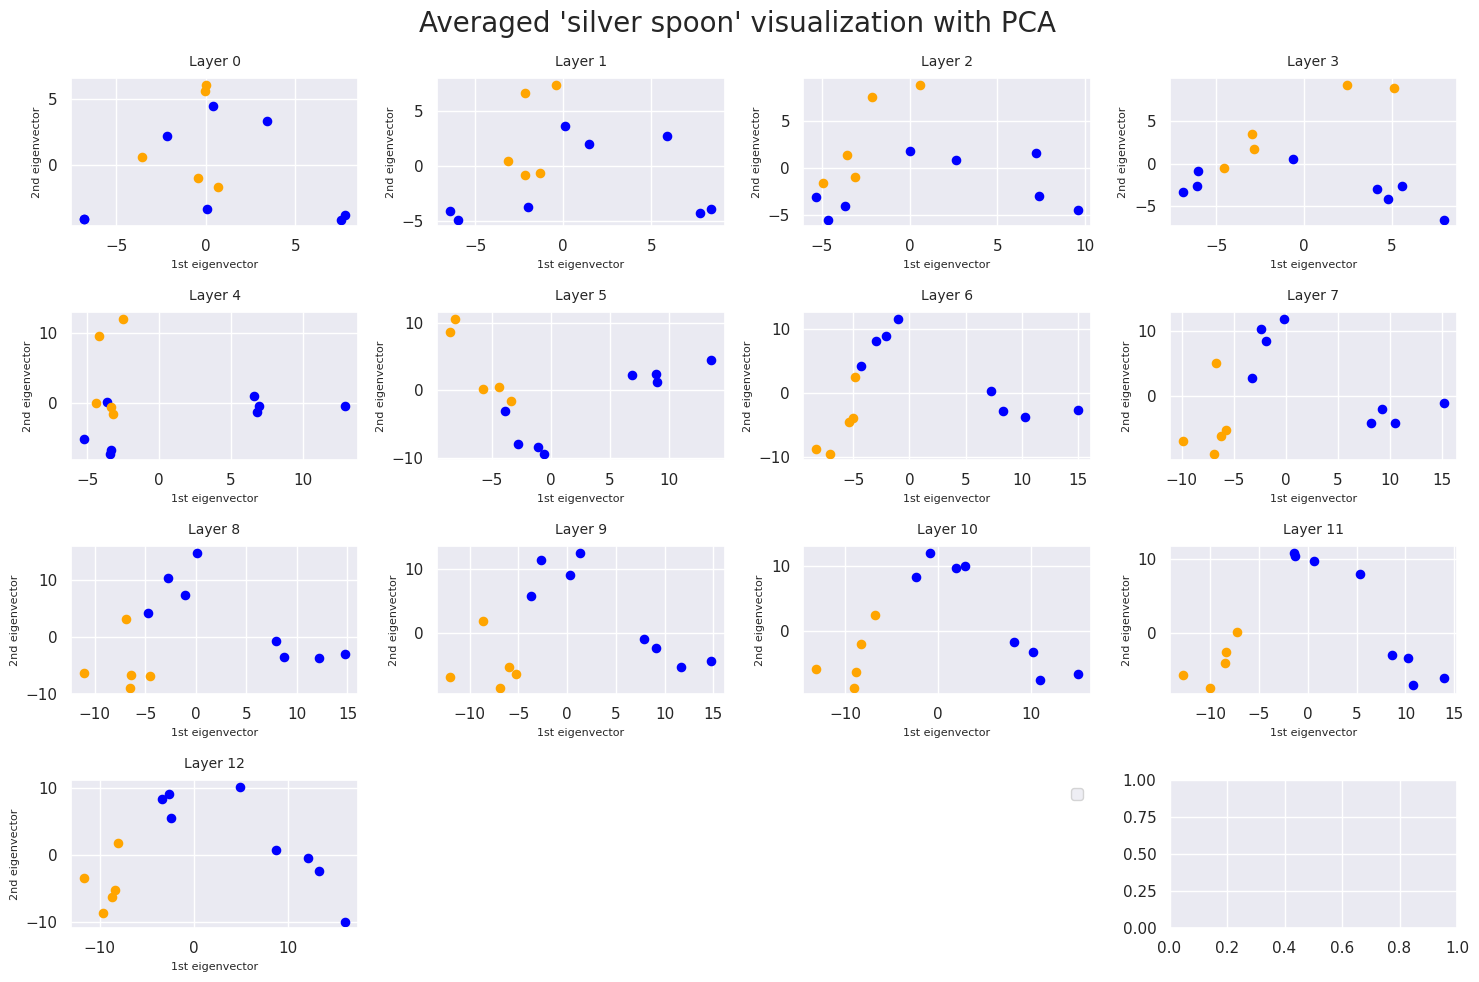

In [ ]:
mwe= "silver spoon"
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_mwe(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, combination_type="average", plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"Averaged '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/Averaged '{mwe}' visualization with PCA.png")
plt.tight_layout()
plt.show()



In [ ]:

nouns = ['deliberation room', 'infamy', 'cracker', 'peeble', 'deliberation', 'freezer', 'cookery', 'sanctum', 'extinguisher', 'photomask', 'slumlord', 'parity', 'parliamentarian', 'pretense', 'soreness']

for m in nouns:
    tokens = tokenizer.tokenize(m)
    if len(tokens) > 2:
        print(tokens)

['del', '##ibe', '##ration', 'room']
['in', '##fa', '##my']
['del', '##ibe', '##ration']
['ex', '##ting', '##uis', '##her']
['photo', '##mas', '##k']
['sl', '##um', '##lord']
['pre', '##tens', '##e']


### Literal vs. idiomatic

In [15]:
mwe_sim_df = pd.DataFrame.from_dict(mwe_similarities, orient='index', columns=['similarity'])
mwe_sim_df.index.name = 'mwe'
mwe_sim_df = mwe_sim_df.reset_index()
mwe_sim_df['nb_literal'] = mwe_sim_df['mwe'].map(pair_df['literal'])
mwe_sim_df['nb_idiomatic'] = mwe_sim_df['mwe'].map(pair_df['idiomatic'])
mwe_sim_df['nb_difference'] = mwe_sim_df['mwe'].map(pair_df['difference'])
mwe_sim_df['most_represented'] = mwe_sim_df['mwe'].map(pair_df['most_represented'])

mwe_mean_starts = get_mean_positions(mwe_starts)
for mwe, (mean_lit, mean_idiom) in mwe_mean_starts.items():
    mwe_sim_df.loc[mwe_sim_df['mwe'] == mwe, 'mean_lit'] = round(mean_lit, 0)
    mwe_sim_df.loc[mwe_sim_df['mwe'] == mwe, 'mean_idiom'] = round(mean_idiom, 0)

mwe_sim_df['position_difference'] = mwe_sim_df.apply(lambda row: compute_difference(row, 'mean_lit', 'mean_idiom'), axis=1)
mwe_sim_df = mwe_sim_df.sort_values(by='mwe', ascending=True)

mwe_sim_df

,mwe,similarity,nb_literal,nb_idiomatic,nb_difference,most_represented,mean_lit,mean_idiom,position_difference
0,acid test,0.982605,7,9,2,idiomatic,12.0,12.0,0.0
2,ancient history,0.977098,15,7,8,literal,22.0,8.0,14.0
13,baby blues,0.991060,17,3,14,literal,11.0,23.0,12.0
16,bad hat,0.988311,10,8,2,literal,13.0,15.0,2.0
20,best man,0.984545,10,10,0,equal,16.0,13.0,3.0
18,big cheese,0.984373,3,19,16,idiomatic,21.0,14.0,7.0
37,big fish,0.981862,7,4,3,literal,25.0,6.0,19.0
28,big wig,0.988578,3,11,8,idiomatic,8.0,13.0,5.0
21,blue blood,0.983291,4,13,9,idiomatic,4.0,14.0,10.0
9,brass ring,0.992760,9,17,8,idiomatic,10.0,18.0,8.0


In [9]:
# Over all layers
mwes = pair_df.index.tolist()
layer_res = []
for layer_id in range(model.config.num_hidden_layers +1): # including the embedding layer
    mwe_similarities = {}
    for mwe in mwes:
        if mwe != 'grass root':  
            mwe_df = data_df[data_df['mwe'] == mwe].copy()
            mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False, tokenizer=tokenizer, model=model)
            mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
            mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
            centroid_lit, centroid_idiom = compute_centroids(mwe_df)
            sim = compute_centroid_cos_sim(centroid_lit, centroid_idiom)
            mwe_similarities[mwe] = sim
    layer_res.append(mwe_similarities)

mwes = sorted(list(layer_res[0].keys()))  # Sort the MWEs alphabetically
result_df = pd.DataFrame(index=mwes)

for layer_id, layer_similarities in enumerate(layer_res):
    layer_values = [layer_similarities.get(mwe, None) for mwe in mwes]
    result_df[layer_id] = layer_values

result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
acid test,0.982605,0.944462,0.912127,0.872480,0.835323,0.733212,0.661154,0.619099,0.565431,0.505159,0.466268,0.460528,0.408714
ancient history,0.977098,0.965804,0.951953,0.939866,0.908685,0.863509,0.817990,0.768112,0.706634,0.632262,0.620568,0.625694,0.599267
baby blues,0.991060,0.951883,0.923498,0.910432,0.867831,0.783373,0.727204,0.688157,0.640988,0.605941,0.586931,0.600628,0.591819
bad hat,0.988351,0.982842,0.975214,0.969936,0.962109,0.943073,0.914189,0.874586,0.833536,0.786084,0.747666,0.731187,0.713566
best man,0.984545,0.970690,0.955631,0.944792,0.928699,0.881916,0.830642,0.787338,0.743861,0.700242,0.680656,0.682991,0.658915
big cheese,0.984373,0.968185,0.946675,0.900577,0.837903,0.757068,0.666114,0.606537,0.556814,0.467510,0.447602,0.487731,0.506524
big fish,0.981862,0.961690,0.939077,0.929678,0.888677,0.829997,0.697964,0.604004,0.527409,0.447980,0.424463,0.483375,0.465671
big wig,0.988578,0.963950,0.929376,0.895859,0.864818,0.801042,0.699417,0.621438,0.552649,0.490954,0.457939,0.472521,0.476149
blue blood,0.983291,0.947527,0.916654,0.878620,0.797551,0.669247,0.584828,0.525082,0.466332,0.396582,0.375871,0.365272,0.273708
brass ring,0.992760,0.962031,0.922504,0.905837,0.875670,0.816596,0.766701,0.742078,0.705720,0.658393,0.637068,0.645425,0.643432


In [ ]:

mwe_stats = {}

for layer_id, layer_similarities in enumerate(layer_res):
    mwe_sims = list(layer_similarities.values())
    
    for mwe, sim in layer_similarities.items():
        if mwe not in mwe_stats:
            mwe_stats[mwe] = {
                'min': [], 'max': [], 'median': [], 'std': []
            }
        
        mwe_stats[mwe]['min'].append(sim)
        mwe_stats[mwe]['max'].append(sim)
        mwe_stats[mwe]['median'].append(sim)
        mwe_stats[mwe]['std'].append(np.std(mwe_sims))

mwe_stats_df = pd.DataFrame.from_dict(mwe_stats, orient='index')

print("Minimum Similarities:")
print(mwe_stats_df['min'].apply(lambda x: '{:.2e}'.format(min(x))))
print("\nMaximum Similarities:")
print(mwe_stats_df['max'].apply(lambda x: '{:.2e}'.format(max(x))))
print("\nMedian Similarities:")
print(mwe_stats_df['median'].apply(lambda x: '{:.2e}'.format(np.median(x))))
print("\nStandard Deviations:")
print(mwe_stats_df['std'].apply(lambda x: '{:.2e}'.format(np.mean(x))))


Minimum Similarities:
acid test          4.09e-01
chain reaction     4.77e-01
ancient history    5.99e-01
public service     3.46e-01
sitting duck       4.91e-01
cutting edge       3.11e-01
fine line          3.36e-01
sacred cow         4.64e-01
busy bee           3.61e-01
brass ring         6.37e-01
heavy cross        3.42e-01
silver spoon       4.89e-01
ground floor       5.90e-01
baby blues         5.87e-01
hard shoulder      4.73e-01
silver lining      2.67e-01
bad hat            7.13e-01
nest egg           4.82e-01
big cheese         4.48e-01
dry land           4.55e-01
best man           6.59e-01
blue blood         2.74e-01
small fry          4.02e-01
rocket science     4.54e-01
poison pill        4.48e-01
double cross       3.03e-01
goose egg          5.19e-01
brick wall         6.96e-01
big wig            4.58e-01
smoke screen       2.78e-01
top dog            3.73e-01
gold mine          2.08e-01
food market        5.16e-01
glass ceiling      5.14e-01
low profile        2.58e-0

In [ ]:
# For the paper
mwe_stats = {}

for layer_id, layer_similarities in enumerate(layer_res):
    mwe_sims = list(layer_similarities.values())
    
    for mwe, sim in layer_similarities.items():
        if mwe not in mwe_stats:
            mwe_stats[mwe] = []
        
        mwe_stats[mwe].append(sim)

mwe_stats_series = pd.Series({mwe: [np.min(sims), np.max(sims), np.std(sims), np.median(sims)] for mwe, sims in mwe_stats.items()})

for mwe, stats in mwe_stats_series.items():
    print(f"{mwe}: min={stats[0]:.2f}, max={stats[1]:.2f}, std={stats[2]:.2f}, median={stats[3]:.2f}")


acid test: min=0.41, max=0.98, std=0.19, median=0.66
chain reaction: min=0.48, max=0.98, std=0.15, median=0.75
ancient history: min=0.60, max=0.98, std=0.14, median=0.82
public service: min=0.35, max=0.94, std=0.21, median=0.60
sitting duck: min=0.49, max=0.97, std=0.18, median=0.73
cutting edge: min=0.31, max=0.99, std=0.25, median=0.48
fine line: min=0.34, max=0.99, std=0.24, median=0.54
sacred cow: min=0.46, max=0.94, std=0.17, median=0.69
busy bee: min=0.36, max=0.98, std=0.22, median=0.58
brass ring: min=0.64, max=0.99, std=0.12, median=0.77
heavy cross: min=0.34, max=0.96, std=0.23, median=0.62
silver spoon: min=0.49, max=0.98, std=0.18, median=0.77
ground floor: min=0.59, max=0.99, std=0.14, median=0.78
baby blues: min=0.59, max=0.99, std=0.15, median=0.73
hard shoulder: min=0.47, max=0.94, std=0.17, median=0.65
silver lining: min=0.27, max=0.97, std=0.25, median=0.45
bad hat: min=0.71, max=0.99, std=0.10, median=0.91
nest egg: min=0.48, max=0.98, std=0.18, median=0.65
big chees

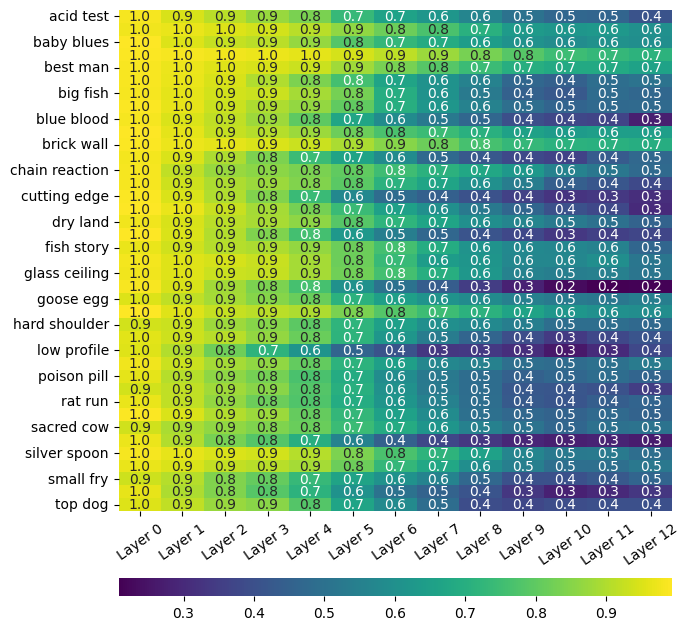

In [19]:
plt.figure(figsize=(7, 7))
sns.heatmap(result_df, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'orientation': 'horizontal', 'pad': 0.1, 'aspect': 30})
plt.xticks(rotation=35)
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(f"../results/plots/alphabetic_simplified_heatmap.png")
plt.show()

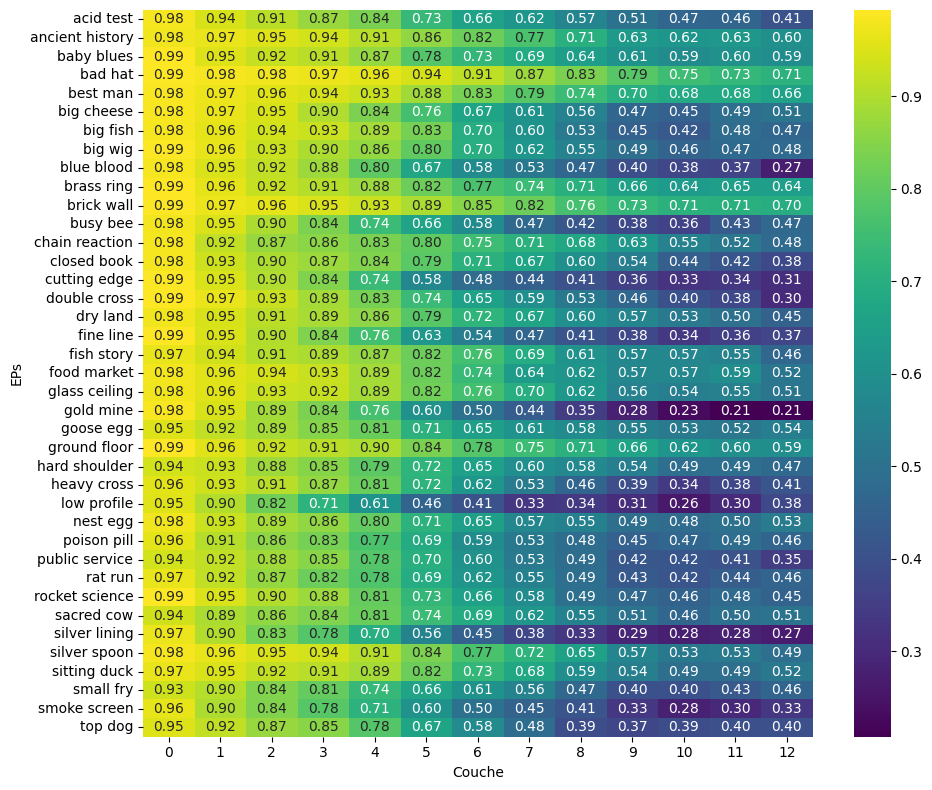

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(result_df, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('Couche')
plt.ylabel('EPs')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(f"../results/plots/Heatmap-bert.pdf")

plt.show()

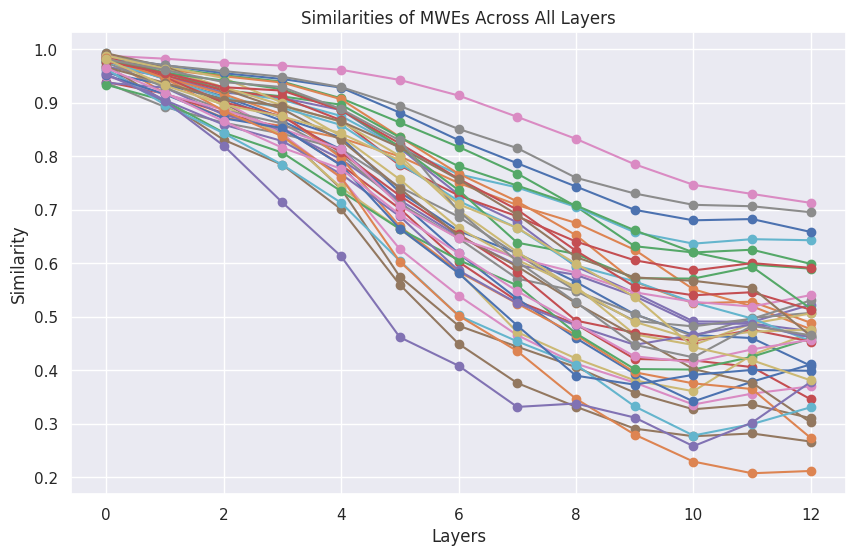

In [ ]:
layers = list(range(13))   
plt.figure(figsize=(10, 6))

for mwe in result_df.index:
    plt.plot(layers, result_df.loc[mwe], marker='o', label=mwe)

plt.xlabel('Layers')
plt.ylabel('Similarity')
plt.title('Similarities of MWEs Across All Layers')
# plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig(f"../results/plots/Similarities of MWEs Across all Layers.png")
plt.show()

### Position testing
Checking whether the intuition that the similarity is impacted by the position is true

#### C

In [ ]:
# On the initial representation
mwe = "silver spoon"
mwe_df = data_df[data_df['mwe'] == mwe].copy()
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
centroid_lit, centroid_idiom = compute_centroids(mwe_df)
compute_centroid_cos_sim(centroid_lit, centroid_idiom)


# Pair mwe with the same position
mwe_filtered = mwe_df[mwe_df['combined_lit'].notnull()]
# Group by mwe_start and check if any group has more than one row 
duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
result = mwe_filtered[duplicate_starts & mwe_filtered['combined_lit'].notnull()]
result



,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start,combined_lit,combined_idiom
0,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,A SILVER spoon declared treasure trove has bee...,The British Museum has agreed to loan the silv...,...,"[volunteers, found, the, spoon, in, the, house...","[silver, spoon]","[[0.9444975, -0.2859117, -0.45643386, 0.027323...","[[-1.2375829, 1.3167453, 0.33507156, 0.7605995...","[[-0.25329638, 0.21993291, 1.2944078, -0.41211...","[[2.105728, -1.5298582, -0.15825157, 0.0038023...",None,8,"[2.105728, -1.5298582, -0.15825157, 0.00380237...",None
7,85,silver spoon,metal spoon,privileged background,None,None,1,metal spoon,His 2018 Senate campaign against Claire McCask...,"In reality, he would probably use a silver spo...",...,"[he, ’, s, the, son, of, a, banker, ,, who, at...","[silver, spoon]","[[1.2200338, -0.053213578, -0.45649448, -0.018...","[[-0.71395665, 0.75590646, -0.34425667, 0.2159...","[[-0.21033578, 0.12921037, 0.9081879, 1.485665...","[[1.7447006, -2.4020066, 0.42999402, 0.0245890...",None,8,"[1.7447006, -2.4020066, 0.42999402, 0.02458901...",None


In [ ]:
filtered_df = result[result['mwe_start'] == 8]
combined_lit_embeddings = filtered_df['combined_lit'].apply(np.array)
cosine_sim = cosine_similarity([combined_lit_embeddings.iloc[0]], [combined_lit_embeddings.iloc[1]])
cosine_sim

array([[0.90206695]], dtype=float32)

In [ ]:
# On the literal group
same_position_sim_df = pd.DataFrame(columns=['MWE', 'Start', 'Cosine Similarity'])
mwe_list = pair_df.index.tolist()

for mwe in mwe_list:
    if mwe != 'grass root':
        mwe_df = data_df[data_df['mwe'] == mwe].copy()
        mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
        mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
        mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
        centroid_lit, centroid_idiom = compute_centroids(mwe_df)
        compute_centroid_cos_sim(centroid_lit, centroid_idiom)

        # Pair mwe with the same position
        mwe_filtered = mwe_df[mwe_df['combined_lit'].notnull()]
        # Group by mwe_start and check if any group has more than one row 
        duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
        result_df = mwe_filtered[duplicate_starts & mwe_filtered['combined_lit'].notnull()]
        if not result_df.empty:
            # print(mwe)
            for start in result_df['mwe_start'].unique():
                # print(f"with position {start}")
                filtered_df = result_df[result_df['mwe_start'] == start]
                combined_lit_embeddings = filtered_df['combined_lit'].apply(np.array)
                # print(len(combined_lit_embeddings))
                cosine_sim = cosine_similarity([combined_lit_embeddings.iloc[0]], [combined_lit_embeddings.iloc[1]])
                same_position_sim_df = pd.concat([same_position_sim_df, pd.DataFrame({'MWE': [mwe], 'Start': [start], 'Cosine Similarity': [cosine_sim[0][0]]})], ignore_index=True)

same_position_sim_df


,MWE,Start,Cosine Similarity
0,ancient history,11,0.854729
1,ancient history,8,0.874531
2,brass ring,9,0.970416
3,brass ring,12,0.952788
4,silver spoon,8,0.902067
5,ground floor,8,0.942699
6,ground floor,10,0.867915
7,ground floor,13,0.941583
8,ground floor,11,1.000000
9,baby blues,3,0.942823


In [ ]:
# Testing whether adding some words will impact the similarity
data_df = retrieve_preprocessed_df(print_ignored=True, words_to_add="Nina said: ")
data_df.head()

We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
There are 20 dropped lemmatization-related issues. For more detail uncomment what comes next in the function.
There are 1,944 remaining sentences in the dataset.


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,after,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe
0,38,sacred cow,divine cow,above criticism,None,None,1,divine cow,"Like beef, pork is also forbidden in Hinduism.","Nina said: However, unlike the sacred cow, the...",This is considered to be particularly impure a...,"[like, beef, ,, pork, is, also, forbidden, in,...","[nina, said, :, however, ,, unlike, the, sacre...","[this, is, considered, to, be, particularly, i...","[sacred, cow]"
1,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"Besides, the Rights group said the Minister of...",Nina said: The Rights group said the ministry ...,HURIWA recalled that the Federal Government on...,"[besides, ,, the, rights, group, said, the, mi...","[nina, said, :, the, rights, group, said, the,...","[hu, ##ri, ##wa, recalled, that, the, federal,...","[sacred, cow]"
2,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"But in the Macquarie judgment, Judge Sandy Str...",Nina said: Barwick says historically there has...,The Fair Work Act is clear that employers cann...,"[but, in, the, macquarie, judgment, ,, judge, ...","[nina, said, :, bar, ##wick, says, historicall...","[the, fair, work, act, is, clear, that, employ...","[sacred, cow]"
3,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"The Commissioner of Police, CP Abutu Yaro, who...",Nina said: The state police boss also directed...,No stone would be left unturned because we are...,"[the, commissioner, of, police, ,, cp, abu, ##...","[nina, said, :, the, state, police, boss, also...","[no, stone, would, be, left, un, ##turn, ##ed,...","[sacred, cow]"
4,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,The committee shall come up with findings and ...,Nina said: There is no sacred cow under the la...,"For a deterrent in future, the Chairman shall ...","[the, committee, shall, come, up, with, findin...","[nina, said, :, there, is, no, sacred, cow, un...","[for, a, deter, ##rent, in, future, ,, the, ch...","[sacred, cow]"


In [ ]:
# On the literal group
same_position_sim_df_with_added_words = pd.DataFrame(columns=['MWE', 'Start', 'Cosine Similarity'])
mwe_list = pair_df.index.tolist()

for mwe in mwe_list:
    if mwe != 'grass root':
        mwe_df = data_df[data_df['mwe'] == mwe].copy()
        mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
        mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
        mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
        centroid_lit, centroid_idiom = compute_centroids(mwe_df)
        compute_centroid_cos_sim(centroid_lit, centroid_idiom)

        # Pair mwe with the same position
        mwe_filtered = mwe_df[mwe_df['combined_lit'].notnull()]
        # Group by mwe_start and check if any group has more than one row 
        duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
        result_df = mwe_filtered[duplicate_starts & mwe_filtered['combined_lit'].notnull()]
        if not result_df.empty:
            # print(mwe)
            for start in result_df['mwe_start'].unique():
                # print(f"with position {start}")
                filtered_df = result_df[result_df['mwe_start'] == start]
                combined_lit_embeddings = filtered_df['combined_lit'].apply(np.array)
                # print(len(combined_lit_embeddings))
                cosine_sim = cosine_similarity([combined_lit_embeddings.iloc[0]], [combined_lit_embeddings.iloc[1]])
                same_position_sim_df_with_added_words = pd.concat([same_position_sim_df_with_added_words, pd.DataFrame({'MWE': [mwe], 'Start': [start], 'Cosine Similarity': [cosine_sim[0][0]]})], ignore_index=True)

same_position_sim_df_with_added_words


,MWE,Start,Cosine Similarity
0,ancient history,14,0.849197
1,ancient history,11,0.874470
2,brass ring,12,0.969654
3,brass ring,15,0.954785
4,silver spoon,11,0.900853
5,ground floor,11,0.940492
6,ground floor,13,0.869772
7,ground floor,16,0.944215
8,ground floor,14,1.000000
9,baby blues,6,0.945900


In [ ]:
# Difference between the initial corpus and the modified one
merged_df = pd.concat([same_position_sim_df, same_position_sim_df_with_added_words], axis=1)
merged_df.columns = ['MWE', 'Start', 'Cosine Similarity', 'MWE_added', 'Start_added', 'Cosine Similarity_added']
merged_df = merged_df.drop('MWE_added', axis=1)
merged_df["Sim diff"] = merged_df[["Cosine Similarity", "Cosine Similarity_added"]].max(axis=1) - merged_df[["Cosine Similarity", "Cosine Similarity_added"]].min(axis=1)

merged_df


,MWE,Start,Cosine Similarity,Start_added,Cosine Similarity_added,Sim diff
0,ancient history,11,0.854729,14,0.849197,5.531967e-03
1,ancient history,8,0.874531,11,0.874470,6.175041e-05
2,brass ring,9,0.970416,12,0.969654,7.623434e-04
3,brass ring,12,0.952788,15,0.954785,1.997292e-03
4,silver spoon,8,0.902067,11,0.900853,1.214147e-03
5,ground floor,8,0.942699,11,0.940492,2.206504e-03
6,ground floor,10,0.867915,13,0.869772,1.856625e-03
7,ground floor,13,0.941583,16,0.944215,2.631664e-03
8,ground floor,11,1.000000,14,1.000000,3.576279e-07
9,baby blues,3,0.942823,6,0.945900,3.077745e-03


In [ ]:
# Going back to the normal df
data_df = retrieve_preprocessed_df(print_ignored=True)
data_df.head()

We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
There are 20 dropped lemmatization-related issues. For more detail uncomment what comes next in the function.
There are 1,944 remaining sentences in the dataset.


,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,after,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe
0,38,sacred cow,divine cow,above criticism,None,None,1,divine cow,"Like beef, pork is also forbidden in Hinduism.","However, unlike the sacred cow, the pig repres...",This is considered to be particularly impure a...,"[like, beef, ,, pork, is, also, forbidden, in,...","[however, ,, unlike, the, sacred, cow, ,, the,...","[this, is, considered, to, be, particularly, i...","[sacred, cow]"
1,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"Besides, the Rights group said the Minister of...",The Rights group said the ministry has continu...,HURIWA recalled that the Federal Government on...,"[besides, ,, the, rights, group, said, the, mi...","[the, rights, group, said, the, ministry, has,...","[hu, ##ri, ##wa, recalled, that, the, federal,...","[sacred, cow]"
2,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"But in the Macquarie judgment, Judge Sandy Str...",Barwick says historically there has been littl...,The Fair Work Act is clear that employers cann...,"[but, in, the, macquarie, judgment, ,, judge, ...","[bar, ##wick, says, historically, there, has, ...","[the, fair, work, act, is, clear, that, employ...","[sacred, cow]"
3,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,"The Commissioner of Police, CP Abutu Yaro, who...",The state police boss also directed the full e...,No stone would be left unturned because we are...,"[the, commissioner, of, police, ,, cp, abu, ##...","[the, state, police, boss, also, directed, the...","[no, stone, would, be, left, un, ##turn, ##ed,...","[sacred, cow]"
4,38,sacred cow,divine cow,above criticism,None,None,0,above criticism,The committee shall come up with findings and ...,There is no sacred cow under the law of probit...,"For a deterrent in future, the Chairman shall ...","[the, committee, shall, come, up, with, findin...","[there, is, no, sacred, cow, under, the, law, ...","[for, a, deter, ##rent, in, future, ,, the, ch...","[sacred, cow]"


In [ ]:
# ancient history
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="ancient history", start=11, layer_id=0, group_type="C", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,1,7,46,38,8,0.854729


In [ ]:
print(result_df.at[1, "sentence_tokens"])
print(result_df.at[7, "sentence_tokens"])

['today', ',', 'the', 'country', 'has', 'important', 'researchers', 'in', 'the', 'field', 'of', 'ancient', 'history', ',', 'who', 'with', 'their', 'studies', 'are', 'contributing', ',', 'just', 'as', 'lab', '##eca', 'does', ',', 'to', 'the', 'international', 'discussion', 'on', 'important', 'issues', ',', 'based', 'on', 'a', '"', 'brazilian', 'way', '"', 'of', 'studying', 'antiquity', '.']
['but', 'even', 'if', 'you', 'only', 'have', 'a', 'day', 'to', 'explore', 'its', 'ancient', 'history', 'and', 'distinctive', 'cuisine', ',', 'you', 'won', '’', 't', 'be', 'disappointed', 'with', 'the', 'memories', 'you', '’', 'll', 'collect', 'from', 'your', 'experience', 'in', 'the', 'eternal', 'city', '.']


In [ ]:
# ancient history
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="ancient history", start=8, layer_id=0, group_type="C", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,5,17,38,25,13,0.874531
1,5,18,38,25,13,0.874531
2,17,18,25,25,0,1.000000


In [ ]:
print(result_df.at[5, "sentence_tokens"])
print(result_df.at[17, "sentence_tokens"])
print(result_df.at[18, "sentence_tokens"])

['hackett', 'asks', 'about', 'everything', 'from', 'current', 'events', 'to', 'ancient', 'history', ',', '”', 'mate', '##er', 'said', 'in', 'her', 'post', 'article', ',', '“', 'then', 'drops', 'fun', 'questions', 'into', 'our', 'chat', 'window', 'between', 'rounds', 'that', 'serve', 'as', 'conversation', 'starters', '.', '”']
['five', 'hundred', 'years', 'hence', 'we', 'shall', 'be', 'quite', 'ancient', 'history', 'ourselves', ',', 'and', 'folks', 'can', 'romance', 'over', 'our', 'tombstone', '##s', 'if', 'they', 'feel', 'inclined', '.']
['five', 'hundred', 'years', 'hence', 'we', 'shall', 'be', 'quite', 'ancient', 'history', 'ourselves', ',', 'and', 'folks', 'can', 'romance', 'over', 'our', 'tombstone', '##s', 'if', 'they', 'feel', 'inclined', '.']


In [ ]:
result_df[result_df['mwe_start'] == 8]

,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start,combined_lit,combined_idiom
5,12,ancient history,history,None,in the past,None,1,history,"But Kacie had it all figured out, and took the...",Hackett asks about everything from current eve...,...,"[hackett, collects, answers, via, google, form...","[ancient, history]","[[0.9279442, -0.6031967, -0.5871706, -0.087285...","[[-2.4957101, 1.0793768, -0.57305944, -1.19290...","[[-2.4182167, 0.03306701, -0.035819266, -1.167...","[[0.06975033, 0.6630623, 1.1063374, 0.2101348,...",None,8,"[0.06975033, 0.6630623, 1.1063374, 0.2101348, ...",None
17,12,ancient history,history,None,in the past,None,1,history,Didn't they come sailing over from Denmark an...,Five hundred years hence we shall be quite anc...,...,"[and, after, all, ,, why, should, one, ', s, a...","[ancient, history]","[[0.7141641, -0.37760103, 0.37058303, -1.49903...","[[0.12513557, 0.65270704, 0.75344855, -2.32472...","[[-0.4286968, 0.118121386, -0.012542841, 0.878...","[[0.3520153, 0.742269, 0.22853358, -0.6764336,...",None,8,"[0.3520153, 0.742269, 0.22853358, -0.6764336, ...",None
18,12,ancient history,history,None,in the past,None,1,history,Didn't they come sailing over from Denmark an...,Five hundred years hence we shall be quite anc...,...,"[and, after, all, ,, why, should, one, ', s, a...","[ancient, history]","[[0.7141641, -0.37760103, 0.37058303, -1.49903...","[[0.12513557, 0.65270704, 0.75344855, -2.32472...","[[-0.4286968, 0.118121386, -0.012542841, 0.878...","[[0.3520153, 0.742269, 0.22853358, -0.6764336,...",None,8,"[0.3520153, 0.742269, 0.22853358, -0.6764336, ...",None


In [ ]:
# ground floor, with position 8: 5
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="ground floor", start=8, layer_id=0, group_type="C", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,5,11,26,21,5,0.942699
1,5,20,26,18,8,0.907979
2,5,22,26,31,5,0.925126
3,11,20,21,18,3,0.926830
4,11,22,21,31,10,0.909402
5,20,22,18,31,13,0.896585


In [ ]:
# gold mine, with position 18: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="gold mine", start=18, layer_id=0, group_type="C", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

""


In [ ]:
# closed book, with position 6: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="closed book", start=6, layer_id=0, group_type="C", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,4,11,24,27,3,0.880843
1,4,12,24,27,3,0.880843
2,11,12,27,27,0,1.000000


In [ ]:
print(result_df.at[4, "sentence_tokens"])
print(result_df.at[11, "sentence_tokens"])
print(result_df.at[12, "sentence_tokens"])

['assessments', 'will', 'consist', 'of', 'two', 'hour', 'closed', 'book', 'examinations', 'containing', 'sq', '##e', 'type', 'questions', 'and', 'also', 'a', 'critical', 'analysis', '-', 'based', 'reflective', 'portfolio', '.']
['assessments', 'will', 'consist', 'of', 'two', 'hour', 'closed', 'book', 'examinations', 'containing', 'short', 'answer', 'questions', 'requiring', 'critical', 'analysis', 'of', 'complex', 'case', 'studies', 'as', 'well', 'as', 'multiple', 'choice', 'questions', '.']
['assessments', 'will', 'consist', 'of', 'two', 'hour', 'closed', 'book', 'examinations', 'containing', 'short', 'answer', 'questions', 'requiring', 'critical', 'analysis', 'of', 'complex', 'case', 'studies', 'as', 'well', 'as', 'multiple', 'choice', 'questions', '.']


In [ ]:
mwe = "brass ring"
mwe_df = data_df[data_df['mwe'] == mwe].copy()
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
centroid_lit, centroid_idiom = compute_centroids(mwe_df)
compute_centroid_cos_sim(centroid_lit, centroid_idiom)


# Pair mwe with the same position
mwe_filtered = mwe_df[mwe_df['combined_lit'].notnull()]
# Group by mwe_start and check if any group has more than one row 
duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
result_df = mwe_filtered[duplicate_starts & mwe_filtered['combined_lit'].notnull()]
result_df

,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start,combined_lit,combined_idiom
17,62,brass ring,metal ring,prize,None,None,1,metal ring,"Six months later, Kaye's remains were found in...","Her clothing was scattered nearby, along with ...",...,"[detectives, say, she, was, likely, strangled, .]","[brass, ring]","[[1.5874966, -0.4991001, -0.40537393, -1.82325...","[[0.6092391, -0.0049212123, 1.0599817, 0.21552...","[[1.011383, -1.4488137, -0.2814181, -2.072595,...","[[1.3579316, 0.8884313, -0.8187038, 0.7931193,...",None,9,"[1.3579316, 0.8884313, -0.8187038, 0.7931193, ...",None
19,62,brass ring,metal ring,prize,None,None,1,metal ring,"Made in four sizes, this harness is easy to pu...","In the center of the back, a sturdy brass ring...",...,"[offered, in, two, class, ##y, -, looking, ton...","[brass, ring]","[[0.6099055, -0.39784947, -0.841752, -0.580140...","[[-0.6932877, 0.6458152, 0.40078494, 1.0751733...","[[-0.6058197, 0.746322, 0.9186833, -0.92651904...","[[1.3928375, 1.0641927, -0.59041464, 0.4201535...",None,9,"[1.3928375, 1.0641927, -0.59041464, 0.4201535,...",None
23,62,brass ring,metal ring,prize,None,None,1,metal ring,Lupton notes however it is superior in no othe...,The glass on a Clanny was secured by a large d...,...,"[if, a, splinter, occurred, at, the, end, of, ...","[brass, ring]","[[1.3829657, -2.45254, -0.7322704, -0.02098696...","[[-1.1879071, 0.58848035, 0.40055037, 0.355681...","[[-1.112597, 1.2109202, -0.8636122, -2.059562,...","[[1.3232557, 1.1937606, -0.7993622, 0.7342655,...",None,12,"[1.3232557, 1.1937606, -0.7993622, 0.7342655, ...",None
24,62,brass ring,metal ring,prize,None,None,1,metal ring,"Thank you, Brett Peters, for the delightful tr...",I’d add riding the carousel and trying to catc...,...,"[if, this, 80, -, year, -, old, kid, remembers...","[brass, ring]","[[1.6201464, -0.8584618, -0.6102794, 0.2720190...","[[-0.6580242, 1.067468, -0.3292861, 0.18276122...","[[-0.43983957, 0.52937514, -1.0546703, -2.5101...","[[1.3460448, 1.3053837, -0.7729584, 1.0691234,...",None,12,"[1.3460448, 1.3053837, -0.7729584, 1.0691234, ...",None


In [ ]:
print(result_df.at[17, "sentence_tokens"])
print(result_df.at[19, "sentence_tokens"])

['her', 'clothing', 'was', 'scattered', 'nearby', ',', 'along', 'with', 'a', 'brass', 'ring', 'with', 'the', 'initial', '"', 'p', '.', '"']
['in', 'the', 'center', 'of', 'the', 'back', ',', 'a', 'sturdy', 'brass', 'ring', 'provides', 'a', 'sole', 'attachment', 'point', '.']


In [ ]:
mwe = "ancient history"
mwe_df = data_df[data_df['mwe'] == mwe].copy()
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
centroid_lit, centroid_idiom = compute_centroids(mwe_df)
compute_centroid_cos_sim(centroid_lit, centroid_idiom)


# Pair mwe with the same position
mwe_filtered = mwe_df[mwe_df['combined_lit'].notnull()]
# Group by mwe_start and check if any group has more than one row 
duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
result_df = mwe_filtered[duplicate_starts & mwe_filtered['combined_lit'].notnull()]
result_df

,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,...,after_tokens,tokenized_mwe,prior_embeddings,sentence_embeddings,after_embeddings,literal_embedding,idiomatic_embedding,mwe_start,combined_lit,combined_idiom
1,12,ancient history,history,None,in the past,None,1,history,Rather than carrying out monographic studies o...,"Today, the country has important researchers i...",...,"[keeping, up, to, date, with, international, s...","[ancient, history]","[[0.83749914, -0.79492635, -1.0870472, -0.3447...","[[-1.5194892, -0.1981265, -1.8184749, -0.68622...","[[-0.7093259, 0.21466237, 0.68245685, 1.281335...","[[0.52820724, -0.14193664, 0.9866953, -0.11763...",None,11,"[0.52820724, -0.14193664, 0.9866953, -0.117632...",None
5,12,ancient history,history,None,in the past,None,1,history,"But Kacie had it all figured out, and took the...",Hackett asks about everything from current eve...,...,"[hackett, collects, answers, via, google, form...","[ancient, history]","[[0.9279442, -0.6031967, -0.5871706, -0.087285...","[[-2.4957101, 1.0793768, -0.57305944, -1.19290...","[[-2.4182167, 0.03306701, -0.035819266, -1.167...","[[0.06975033, 0.6630623, 1.1063374, 0.2101348,...",None,8,"[0.06975033, 0.6630623, 1.1063374, 0.2101348, ...",None
7,12,ancient history,history,None,in the past,None,1,history,"As the old saying goes, Rome wasn’t built in a...",But even if you only have a day to explore its...,...,"[from, stroll, ##s, along, the, picturesque, t...","[ancient, history]","[[0.60777384, -0.47420153, -0.93824977, -0.334...","[[0.4185647, 1.0793637, 0.3504648, 0.87544376,...","[[-0.47474083, 0.62245834, 0.4799445, 0.938858...","[[-0.07644948, 0.8552661, 0.6163525, -0.004854...",None,11,"[-0.07644948, 0.8552661, 0.6163525, -0.0048542...",None
17,12,ancient history,history,None,in the past,None,1,history,Didn't they come sailing over from Denmark an...,Five hundred years hence we shall be quite anc...,...,"[and, after, all, ,, why, should, one, ', s, a...","[ancient, history]","[[0.7141641, -0.37760103, 0.37058303, -1.49903...","[[0.12513557, 0.65270704, 0.75344855, -2.32472...","[[-0.4286968, 0.118121386, -0.012542841, 0.878...","[[0.3520153, 0.742269, 0.22853358, -0.6764336,...",None,8,"[0.3520153, 0.742269, 0.22853358, -0.6764336, ...",None
18,12,ancient history,history,None,in the past,None,1,history,Didn't they come sailing over from Denmark an...,Five hundred years hence we shall be quite anc...,...,"[and, after, all, ,, why, should, one, ', s, a...","[ancient, history]","[[0.7141641, -0.37760103, 0.37058303, -1.49903...","[[0.12513557, 0.65270704, 0.75344855, -2.32472...","[[-0.4286968, 0.118121386, -0.012542841, 0.878...","[[0.3520153, 0.742269, 0.22853358, -0.6764336,...",None,8,"[0.3520153, 0.742269, 0.22853358, -0.6764336, ...",None


#### NC

In [ ]:
# On the idiomatic group
same_position_sim_df = pd.DataFrame(columns=['MWE', 'Start', 'Cosine Similarity'])
mwe_list = pair_df.index.tolist()

for mwe in mwe_list:
    if mwe != 'grass root':
        mwe_df = data_df[data_df['mwe'] == mwe].copy()
        mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=0, normalize=True, print_ignored=False)
        mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
        mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)
        centroid_lit, centroid_idiom = compute_centroids(mwe_df)
        compute_centroid_cos_sim(centroid_lit, centroid_idiom)

        # Pair mwe with the same position
        mwe_filtered = mwe_df[mwe_df['combined_idiom'].notnull()]
        # Group by mwe_start and check if any group has more than one row 
        duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
        result_df = mwe_filtered[duplicate_starts & mwe_filtered['combined_idiom'].notnull()]
        if not result_df.empty:
           
            for start in result_df['mwe_start'].unique():
                filtered_df = result_df[result_df['mwe_start'] == start]
                combined_lit_embeddings = filtered_df['combined_idiom'].apply(np.array)
                cosine_sim = cosine_similarity([combined_lit_embeddings.iloc[0]], [combined_lit_embeddings.iloc[1]])
                same_position_sim_df = pd.concat([same_position_sim_df, pd.DataFrame({'MWE': [mwe], 'Start': [start], 'Cosine Similarity': [cosine_sim[0][0]]})], ignore_index=True)

pd.set_option('display.max_rows', None)
same_position_sim_df

,MWE,Start,Cosine Similarity
0,chain reaction,10,0.897054
1,chain reaction,11,0.952009
2,chain reaction,24,1.000000
3,ancient history,4,0.863893
4,ancient history,11,1.000000
5,public service,17,0.915165
6,public service,2,0.938178
7,public service,6,1.000000
8,sitting duck,19,1.000000
9,cutting edge,17,0.948844


In [ ]:
mwe= "ancient history"
mwe_df = data_df[data_df['mwe'] == mwe].copy()
mwe_df

,id,mwe,literal_meaning,_1,_2,_3,0/1,fine_grained,prior,sentence,after,prior_tokens,sentence_tokens,after_tokens,tokenized_mwe
59,12,ancient history,history,None,in the past,None,1,history,Keeping up to date with international studies ...,Brazilian specificity lies in our experience w...,Studying ancient history in Brazil today has t...,"[keeping, up, to, date, with, international, s...","[brazilian, specific, ##ity, lies, in, our, ex...","[studying, ancient, history, in, brazil, today...","[ancient, history]"
60,12,ancient history,history,None,in the past,None,1,history,Rather than carrying out monographic studies o...,"Today, the country has important researchers i...",Keeping up to date with international studies ...,"[rather, than, carrying, out, monograph, ##ic,...","[today, ,, the, country, has, important, resea...","[keeping, up, to, date, with, international, s...","[ancient, history]"
61,12,ancient history,history,None,in the past,None,1,history,COINTELPRO is a stark illustration of how the ...,To disabuse anyone of the comforting delusion ...,The Partnership for Civil Justice obtained doc...,"[coin, ##tel, ##pro, is, a, stark, illustratio...","[to, di, ##sa, ##bus, ##e, anyone, of, the, co...","[the, partnership, for, civil, justice, obtain...","[ancient, history]"
62,12,ancient history,history,None,in the past,None,1,history,The change is a declaration of purpose: to lea...,There’s a more interesting story to be told ab...,It seems to me the really crucial mover in his...,"[the, change, is, a, declaration, of, purpose,...","[there, ’, s, a, more, interesting, story, to,...","[it, seems, to, me, the, really, crucial, move...","[ancient, history]"
63,12,ancient history,history,None,in the past,None,1,history,What kind of student would this course suit?,This course will suit anyone fascinated by anc...,It will appeal to you if you enjoy the challen...,"[what, kind, of, student, would, this, course,...","[this, course, will, suit, anyone, fascinated,...","[it, will, appeal, to, you, if, you, enjoy, th...","[ancient, history]"
64,12,ancient history,history,None,in the past,None,1,history,"But Kacie had it all figured out, and took the...",Hackett asks about everything from current eve...,"Hackett collects answers via Google forms, the...","[but, ka, ##cie, had, it, all, figured, out, ,...","[hackett, asks, about, everything, from, curre...","[hackett, collects, answers, via, google, form...","[ancient, history]"
65,12,ancient history,history,None,in the past,None,1,history,"Western archaeologists, including Reisner, wer...","Now 87, Bonnet has returned to Kerma to conduc...",He identified and excavated a fortified Kushit...,"[western, archaeologists, ,, including, rei, #...","[now, 87, ,, bonnet, has, returned, to, ke, ##...","[he, identified, and, excavated, a, fortified,...","[ancient, history]"
66,12,ancient history,history,None,in the past,None,1,history,"As the old saying goes, Rome wasn’t built in a...",But even if you only have a day to explore its...,From strolls along the picturesque Tiber River...,"[as, the, old, saying, goes, ,, rome, wasn, ’,...","[but, even, if, you, only, have, a, day, to, e...","[from, stroll, ##s, along, the, picturesque, t...","[ancient, history]"
67,12,ancient history,history,None,in the past,None,1,history,In 1956 Delhi was converted into Union Territory.,This was the brief ancient history of New Delh...,"Their cuisine, clothes and rituals are still v...","[in, 1956, delhi, was, converted, into, union,...","[this, was, the, brief, ancient, history, of, ...","[their, cuisine, ,, clothes, and, rituals, are...","[ancient, history]"
68,12,ancient history,history,None,in the past,None,1,history,While Renaissance scholars were fascinated by ...,That exclusion was at the heart of classics as...,Among those Enlightenment thinkers were many o...,"[while, renaissance, scholars, were, fascinate...","[that, exclusion, was, at, the, heart, of, cla...","[among, those, enlightenment, thinkers, were, 

In [ ]:
group_type = "C"
words_to_add = "Nina said: "
mwe_df = data_df[data_df['mwe'] == mwe].copy()
mwe_df = retrieve_encoded_df(mwe_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False)
mwe_df["combined_lit"] = mwe_df.apply(lambda row: combine_embeddings(row['literal_embedding'][0], row['literal_embedding'][1], "concatenation") if row['literal_embedding'] is not None else None, axis=1)
mwe_df["combined_idiom"] = mwe_df.apply(lambda row: combine_embeddings(row['idiomatic_embedding'][0], row['idiomatic_embedding'][1], "concatenation") if row['idiomatic_embedding'] is not None else None, axis=1)

# Pair mwe with the same position
if group_type == "C":
    col = "combined_lit"
elif group_type == "NC":
    col= "combined_idiom"
mwe_filtered = mwe_df[mwe_df[col].notnull()]
duplicate_starts = mwe_filtered.groupby('mwe_start')['mwe_start'].transform('count') > 1
result_df = mwe_filtered[duplicate_starts & mwe_filtered[col].notnull()]

similarity_data = []
filtered_df = result_df[result_df['mwe_start'] == start]

combined_embeddings = filtered_df[col].apply(np.array)
embeddings = combined_embeddings.tolist()
row_ids = filtered_df.index.tolist()

# Get all possible pairs of embeddings and row IDs
pairs = list(itertools.combinations(zip(embeddings, row_ids), 2))

# Compute cosine similarity for each pair
for pair in pairs:
    (emb1, row_id1), (emb2, row_id2) = pair
    
    cosine_sim = cosine_similarity([emb1], [emb2])[0][0]
    similarity_data.append({'Row1': row_id1, 
                            'Row2': row_id2, 
                            'Nb tokens sent1': len(result_df.at[row_id1, "sentence_tokens"]), 
                            'Nb tokens sent2': len(result_df.at[row_id2, "sentence_tokens"]),
                            'Nb tokens diff': max(len(result_df.at[row_id1, "sentence_tokens"]), len(result_df.at[row_id2, "sentence_tokens"])) - min(len(result_df.at[row_id1, "sentence_tokens"]), len(result_df.at[row_id2, "sentence_tokens"])),
                            'Cosine Similarity': cosine_sim}
                            )

similarity_df = pd.DataFrame(similarity_data)
    

In [ ]:
# chain reaction, with position 10: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="chain reaction", start=10, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,1,4,72,33,39,0.897054


In [ ]:
print(result_df.at[1, "sentence_tokens"])
print(result_df.at[4, "sentence_tokens"])
print(result_df.at[3, "sentence_tokens"])

['no', 'injuries', 'were', 'reported', 'among', 'the', 'others', 'impacted', 'by', 'the', 'chain', 'reaction', 'crash', 'including', 'francis', 'fox', ',', '64', ',', 'of', 'po', '##mp', '##ano', 'beach', ';', 'paul', 'thom', '##pkins', ',', '60', ',', 'of', 'boca', 'rat', '##on', ';', 'ken', '##dia', 'jenkins', ',', '35', ',', 'of', 'po', '##mp', '##ano', 'beach', ';', 'gu', '##er', '##line', 'der', '##il', '##us', ',', '34', ',', 'deer', '##field', 'beach', ';', 'danny', 'mc', '##bra', '##z', ',', '54', ',', 'of', 'coconut', 'creek', '.']
['it', 'appears', 'that', 'the', 'keating', 'resources', 'project', 'led', 'to', 'a', 'chain', 'reaction', ',', 'including', 'the', 'purchase', 'of', 'a', 'nearby', 'building', 'at', '102', 'e', '.', 'state', 'st', '.', 'from', 'michelle', 'and', 'brent', 'ogden', '.']
['the', 'impact', 'pushed', 'healy', "'", 's', 'car', 'forward', 'and', 'started', 'a', 'chain', 'reaction', 'that', 'impacted', 'four', 'other', 'cars', 'that', 'had', 'stopped', 'at

In [ ]:
# chain reaction, with position 11: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="chain reaction", start=11, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,2,3,16,25,9,0.952009
1,2,5,16,15,1,0.930117
2,2,9,16,21,5,0.885770
3,3,5,25,15,10,0.882969
4,3,9,25,21,4,0.905660
5,5,9,15,21,6,0.953280


In [ ]:
print(result_df.at[2, "sentence_tokens"])
print(result_df.at[5, "sentence_tokens"])
print(result_df.at[9, "sentence_tokens"])

['sheridan', 'said', 'any', 'number', 'of', 'variables', 'could', 'have', 'set', 'the', 'deadly', 'chain', 'reaction', 'into', 'motion', '.']
['if', 'the', 'uk', 'were', 'to', 'leave', ',', 'it', 'could', 'trigger', 'a', 'chain', 'reaction', '.', '"']
['a', 'car', 'had', 'rear', '-', 'ended', 'another', 'vehicle', ',', 'causing', 'a', 'chain', 'reaction', 'of', 'crashes', ',', 'a', 'police', 'spokesperson', 'said', '.']


In [ ]:
# chain reaction, with position 23: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="chain reaction", start=23, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

""


In [ ]:

print(result_df.at[10, "sentence_tokens"])
print(result_df.at[12, "sentence_tokens"])

['that', "'", 's', 'what', 'we', 'see', 'here', 'is', 'the', 'commercial', 'motor', 'vehicle', 'truck', 'traffic', 'just', 'could', 'not', 'get', 'stopped', 'in', 'time', 'and', 'had', 'this', 'chain', 'reaction', 'crash', ',', '"', 'din', '##kla', 'added', '.']
['that', "'", 's', 'what', 'we', 'see', 'here', 'is', 'the', 'commercial', 'motor', 'vehicle', 'truck', 'traffic', 'just', 'could', 'not', 'get', 'stopped', 'in', 'time', 'and', 'had', 'this', 'chain', 'reaction', 'crash', ',', '"', 'din', '##kla', 'added', '.']


In [ ]:
# sacred cow, with position 3: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="sacred cow", start=3, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,4,7,15,15,0,0.921699
1,4,8,15,16,1,0.923377
2,7,8,15,16,1,0.932002


In [ ]:
print(result_df.at[4, "sentence_tokens"])
print(result_df.at[7, "sentence_tokens"])
print(result_df.at[8, "sentence_tokens"])

['there', 'is', 'no', 'sacred', 'cow', 'under', 'the', 'law', 'of', 'pro', '##bit', '##y', 'and', 'accountability', '.']
['by', 'making', 'a', 'sacred', 'cow', 'of', 'the', 'latter', 'we', 'have', 'betrayed', 'the', 'former', '.', '"']
['no', 'one', 'is', 'sacred', 'cow', ',', 'no', 'one', 'is', 'above', 'accountability', ',', '”', 'he', 'said', '.']


In [ ]:
# silver lining, with position 1: 4
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="silver lining", start=1, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,8,9,32,77,45,0.926530
1,8,14,32,27,5,0.930381
2,8,19,32,27,5,0.930381
3,9,14,77,27,50,0.895022
4,9,19,77,27,50,0.895022
5,14,19,27,27,0,1.000000


In [ ]:
print(result_df.at[8, "sentence_tokens"])
print(result_df.at[9, "sentence_tokens"])
print(result_df.at[14, "sentence_tokens"])
print(result_df.at[19, "sentence_tokens"])

['a', 'silver', 'lining', 'of', 'the', 'pan', '##de', '##mic', ',', 'apple', '##baum', 'said', ',', 'is', 'that', 'tel', '##eme', '##dic', '##ine', 'has', 'actually', 'made', 'mental', 'health', 'services', 'more', 'accessible', 'to', 'many', 'cancer', 'patients', '.']
['the', 'silver', 'lining', 'is', 'that', 'this', 'same', 'sense', 'of', 'urgency', 'in', 'the', 'design', ',', 'development', ',', 'testing', 'and', 'licensing', 'of', 'medical', 'technologies', 'can', 'be', 'brought', 'to', 'bear', 'to', 'resolve', 'long', '##standing', 'problems', 'in', 'other', 'areas', 'such', 'as', 'hiv', 'and', 'malaria', 'where', 'effective', 'drugs', 'and', 'technologies', 'are', 'under', 'threat', 'of', 'anti', '##mic', '##ro', '##bial', 'resistance', 'and', 'new', 'and', 'more', 'effective', 'therapeutic', '##s', 'take', 'an', 'in', '##ord', '##inate', 'amount', 'of', 'time', 'to', 'be', 'developed', 'and', 'brought', 'to', 'market', '.']
['the', 'silver', 'lining', 'this', 'year', 'especially

In [ ]:
# big cheese, with position 2: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="big cheese", start=2, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,3,10,22,25,3,0.927573
1,3,18,22,20,2,0.879242
2,10,18,25,20,5,0.888530


In [ ]:
print(result_df.at[3, "sentence_tokens"])
print(result_df.at[10, "sentence_tokens"])
print(result_df.at[18, "sentence_tokens"])

['the', 'former', 'big', 'cheese', 'of', 'papa', 'john', "'", 's', 'is', 'weighing', 'in', 'on', 'the', 'pizza', 'chain', 'moving', 'part', 'of', 'its', 'business', '.']
['the', 'new', 'big', 'cheese', ',', 'joe', 'bid', '##en', ',', 'has', 'been', 'suggesting', 'dropping', 'the', 'tariffs', ',', 'so', 'we', 'can', 'keep', 'doing', 'co', '##sp', '##lay', '.']
['the', 'new', 'big', 'cheese', ',', 'and', 'man', 'who', 'wrote', 'those', 'words', ',', 'is', 'shi', '##ge', '##mi', 'su', '##gi', '##moto', '.']


In [ ]:
# small fry, with position 3: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="small fry", start=3, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,7,15,6,16,10,0.899201


In [ ]:
print(result_df.at[7, "sentence_tokens"])
print(result_df.at[15, "sentence_tokens"])

['these', 'accused', 'are', 'small', 'fry', '.']
['however', 'this', 'is', 'small', 'fry', 'compared', 'to', 'some', 'of', 'the', 'cast', 'of', 'b', '##ling', 'empire', '.']


In [ ]:
# rocket science, with position 3: 4
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="rocket science", start=3, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

""


In [ ]:
# poison pill, with position 3: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="poison pill", start=3, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,10,11,22,26,4,0.948964


In [ ]:
# poison pill, with position 9: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="poison pill", start=9, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,15,16,13,24,11,0.937178
1,15,19,13,21,8,0.932303
2,16,19,24,21,3,0.933206


In [ ]:
print(result_df.at[15, "sentence_tokens"])
print(result_df.at[16, "sentence_tokens"])
print(result_df.at[19, "sentence_tokens"])

['the', 'people', 'pill', 'strategy', 'is', 'a', 'variation', 'of', 'the', 'poison', 'pill', 'defense', '.']
['still', ',', 'cubic', 'emphasized', 'at', 'the', 'time', 'that', 'the', 'poison', 'pill', 'was', 'tailored', 'to', 'allow', 'its', 'board', 'to', 'consider', 'fair', 'buy', '##out', 'offers', '.']
['in', 'the', 'us', 'companies', 'protect', 'themselves', 'with', 'a', '‘', 'poison', 'pill', '’', 'clause', ',', 'but', 'british', 'companies', 'cannot', 'do', 'this', '.']


In [ ]:
# glass ceiling, with position 16: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="glass ceiling", start=16, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,6,11,29,21,8,0.878574


In [ ]:
# big fish, with position 5: 3
result_df, similarity_df = compute_sim_pair_same_position(data_df=data_df, mwe="big fish", start=5, layer_id=0, group_type="NC", retrieve_encoded_df=retrieve_encoded_df, combine_embeddings=combine_embeddings)
similarity_df

,Row1,Row2,Nb tokens sent1,Nb tokens sent2,Nb tokens diff,Cosine Similarity
0,7,9,19,19,0,1.0


### First vs. second vector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

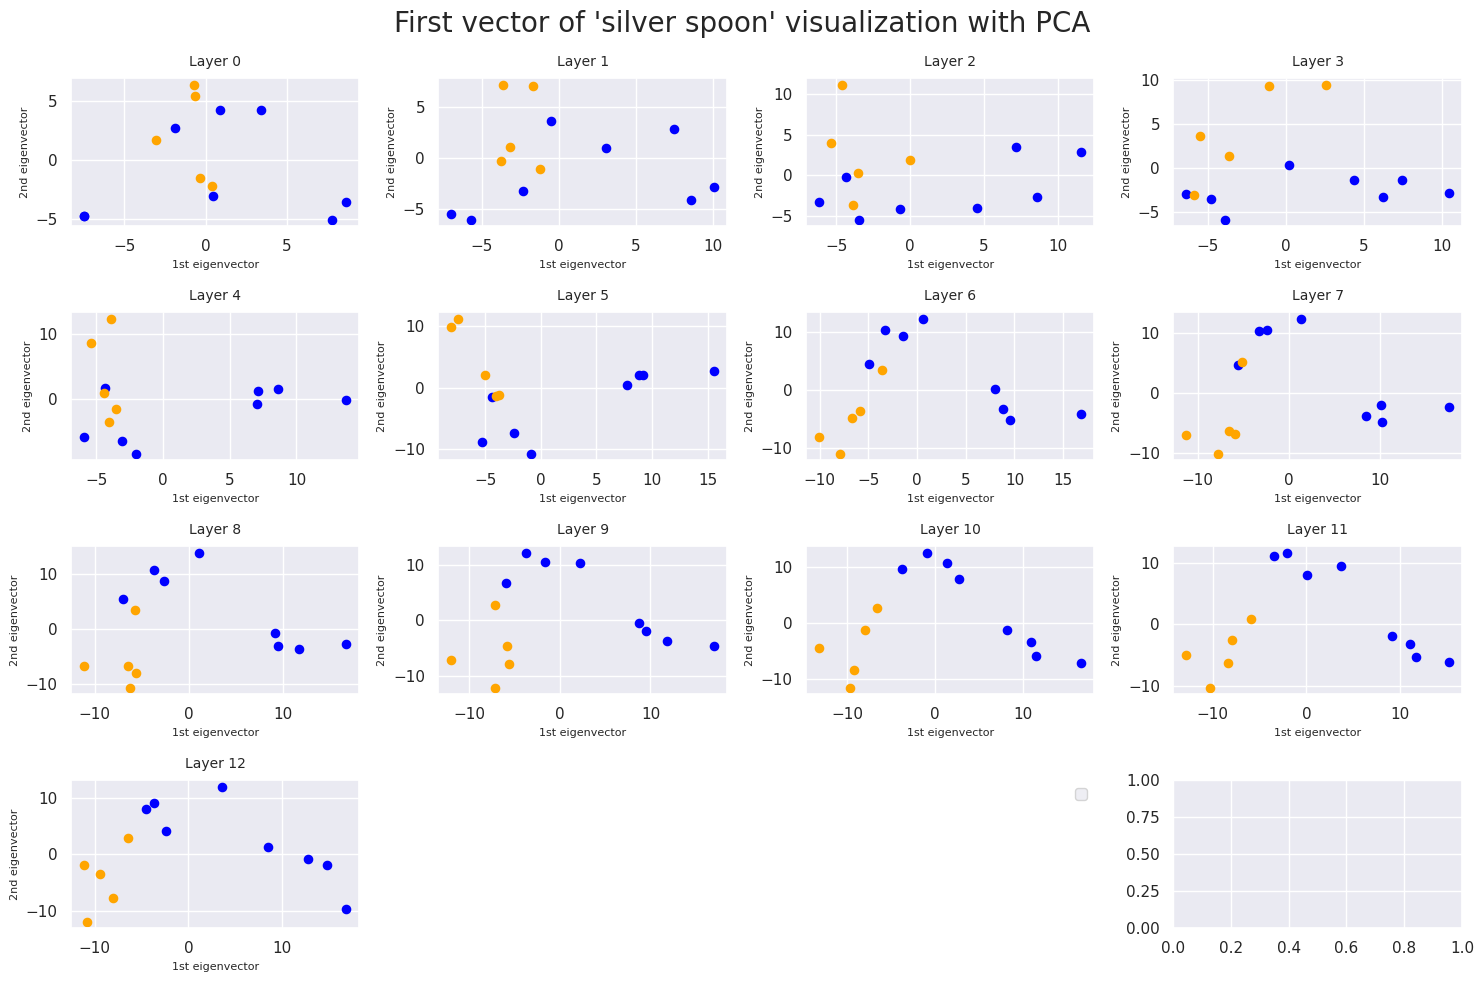

In [ ]:
mwe= "silver spoon"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

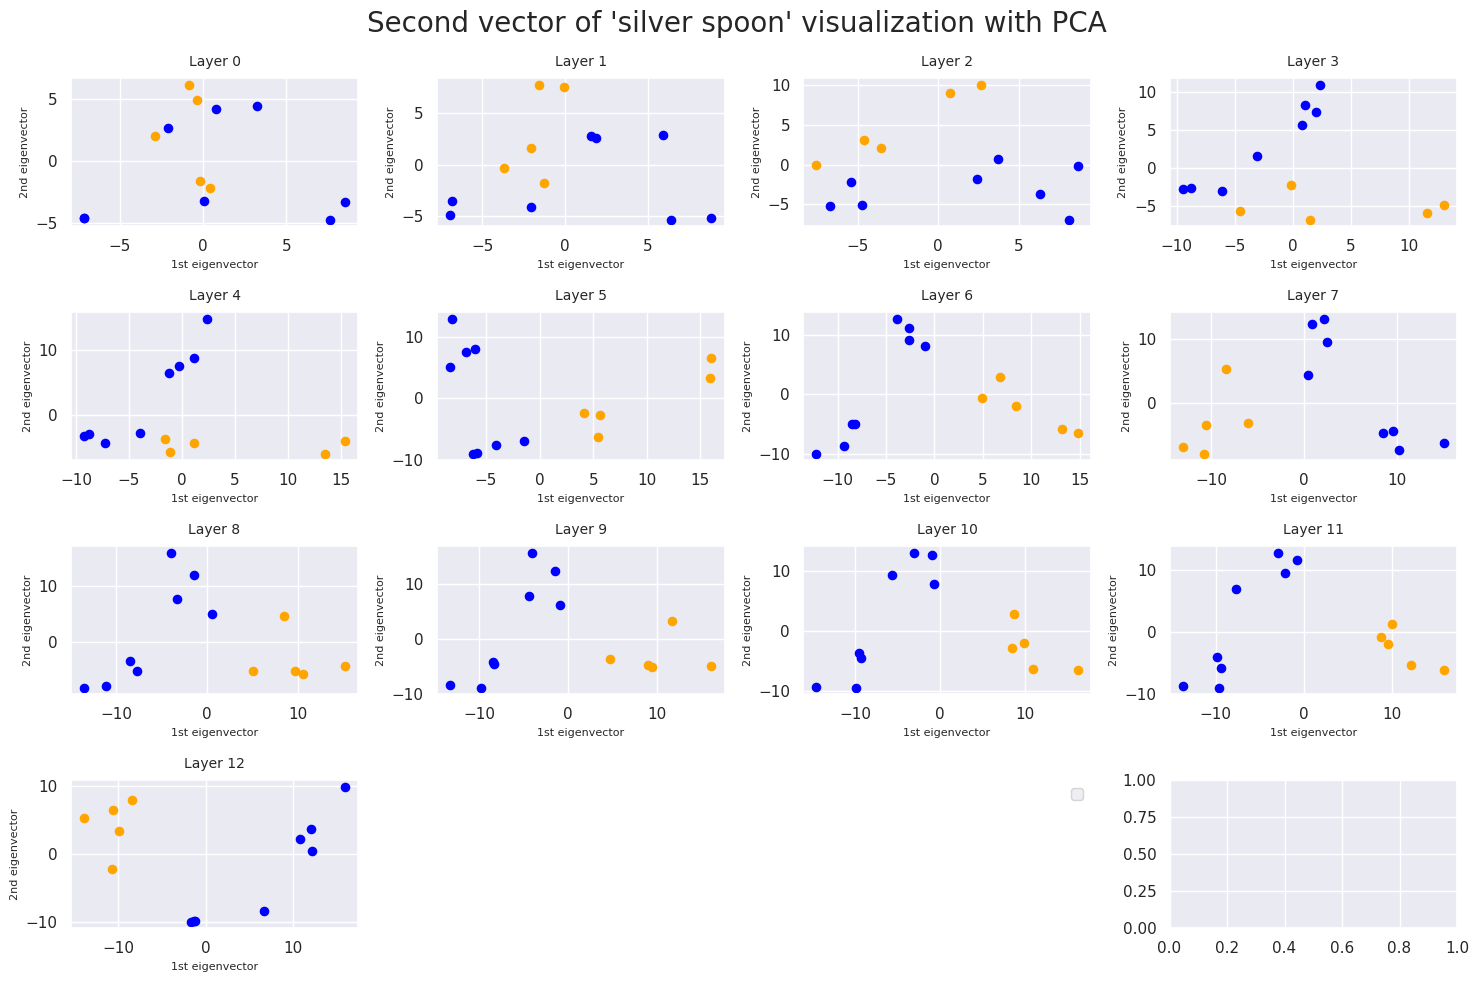

In [ ]:
mwe= "silver spoon"
embed_id=1
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

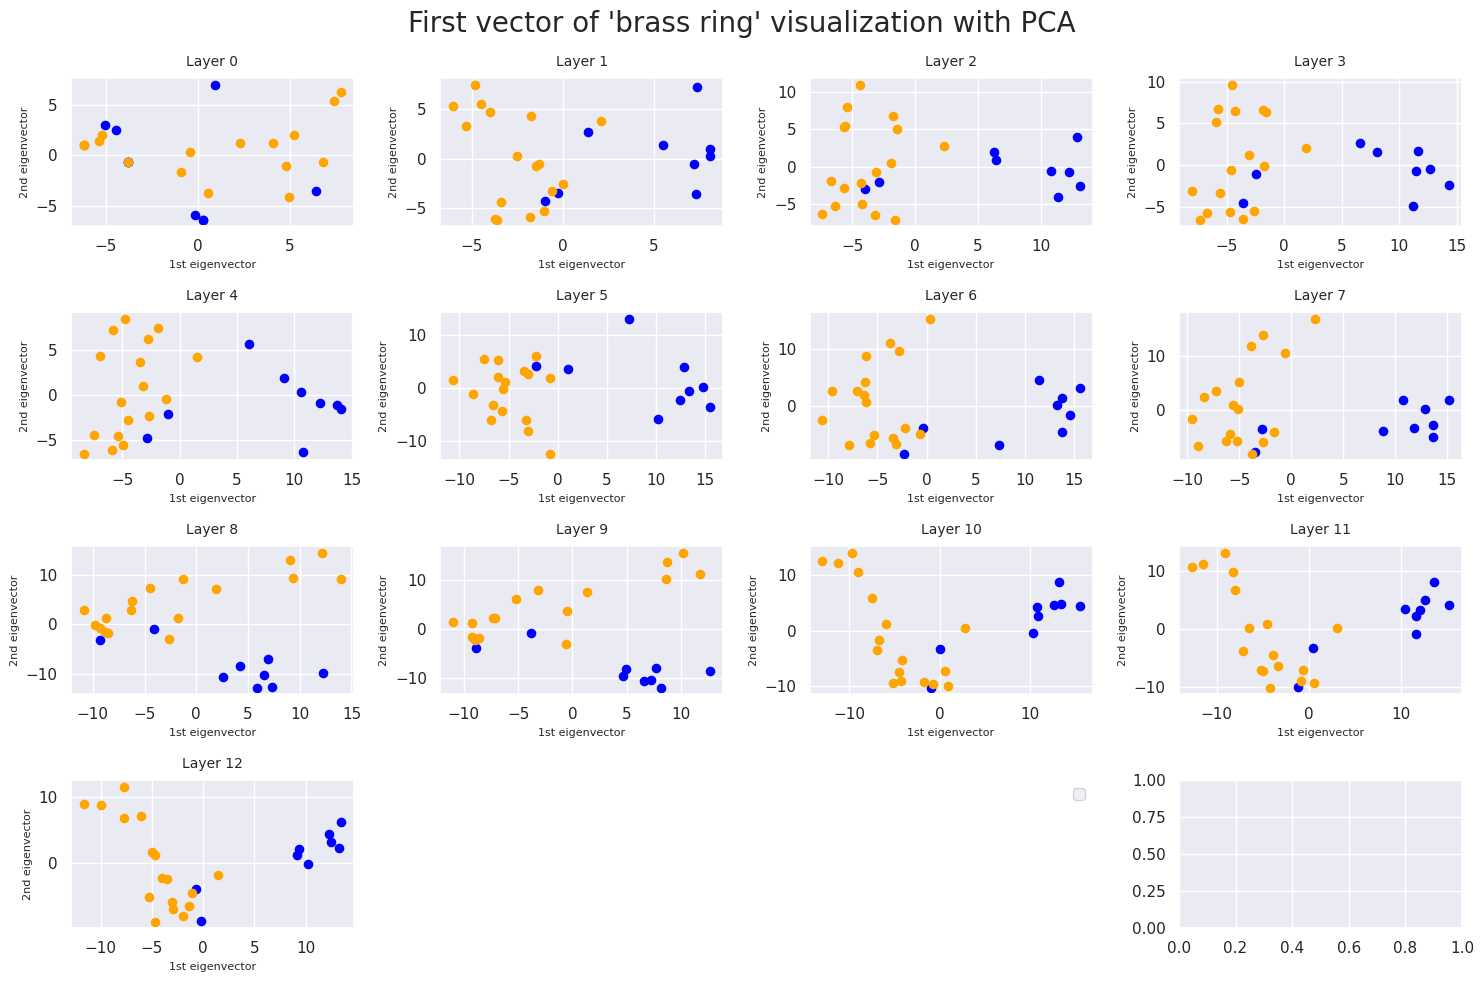

In [ ]:
mwe= "brass ring"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

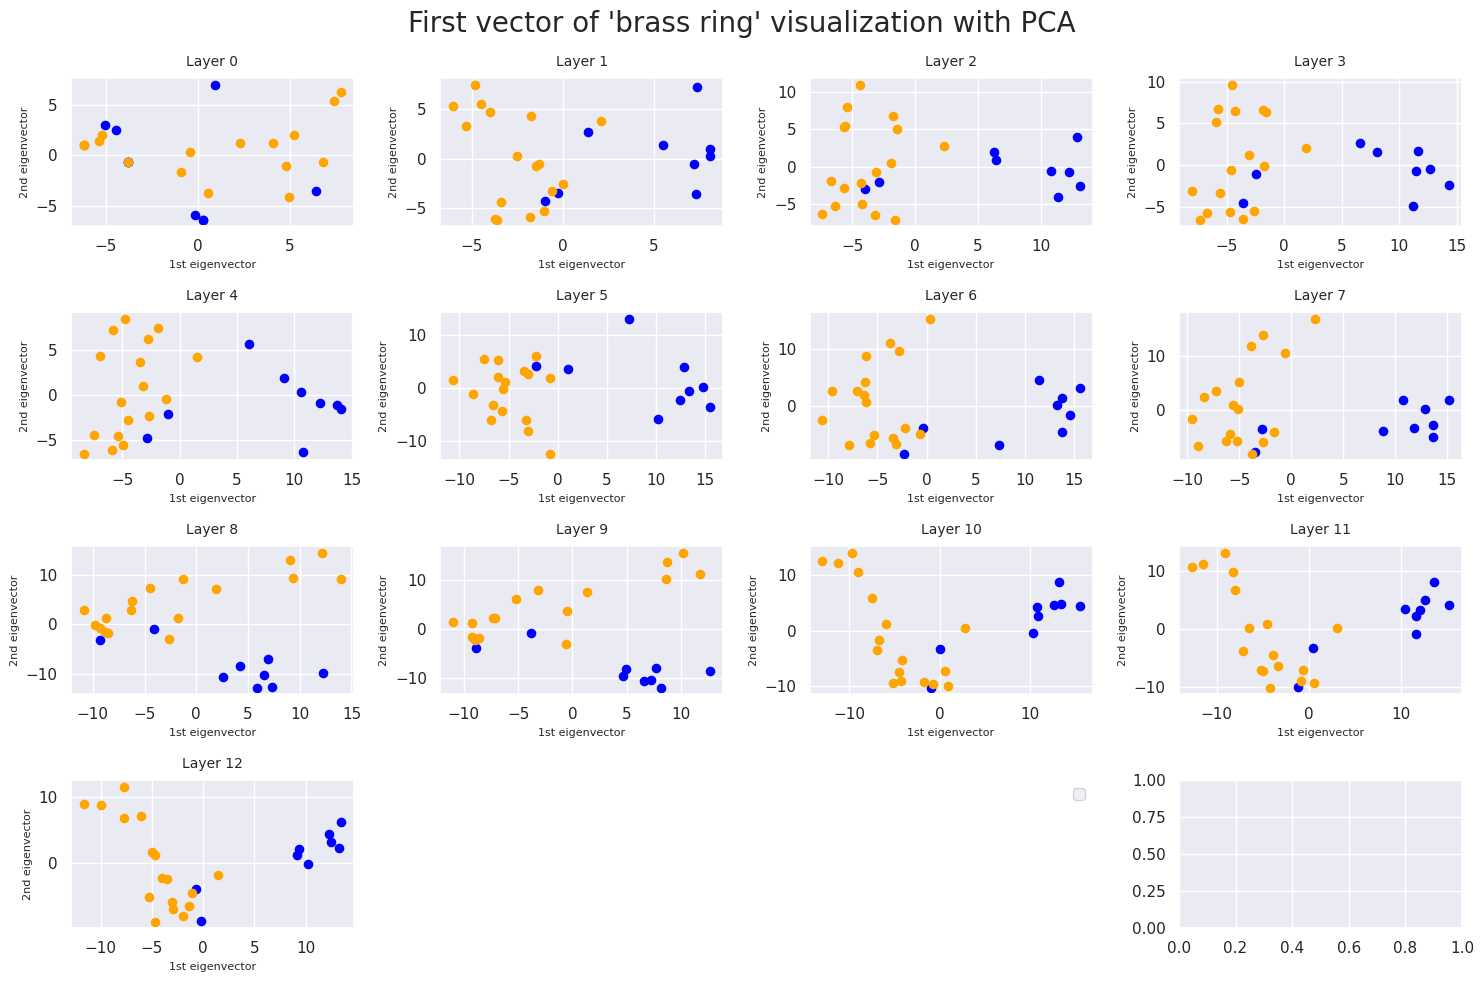

In [ ]:
mwe= "brass ring"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

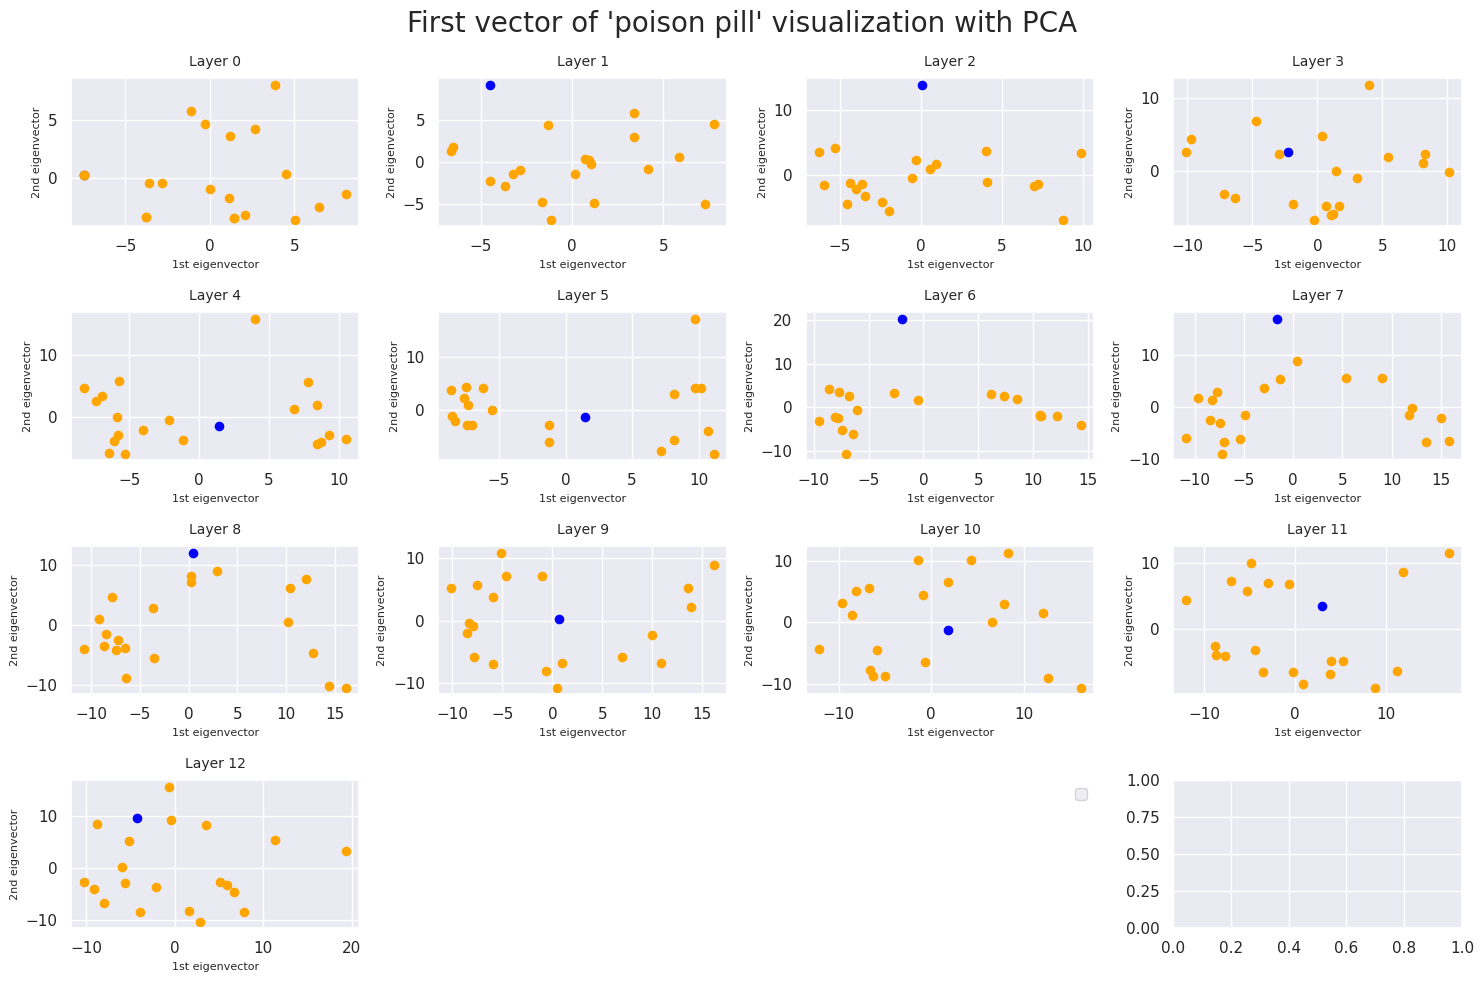

In [ ]:
mwe= "poison pill"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

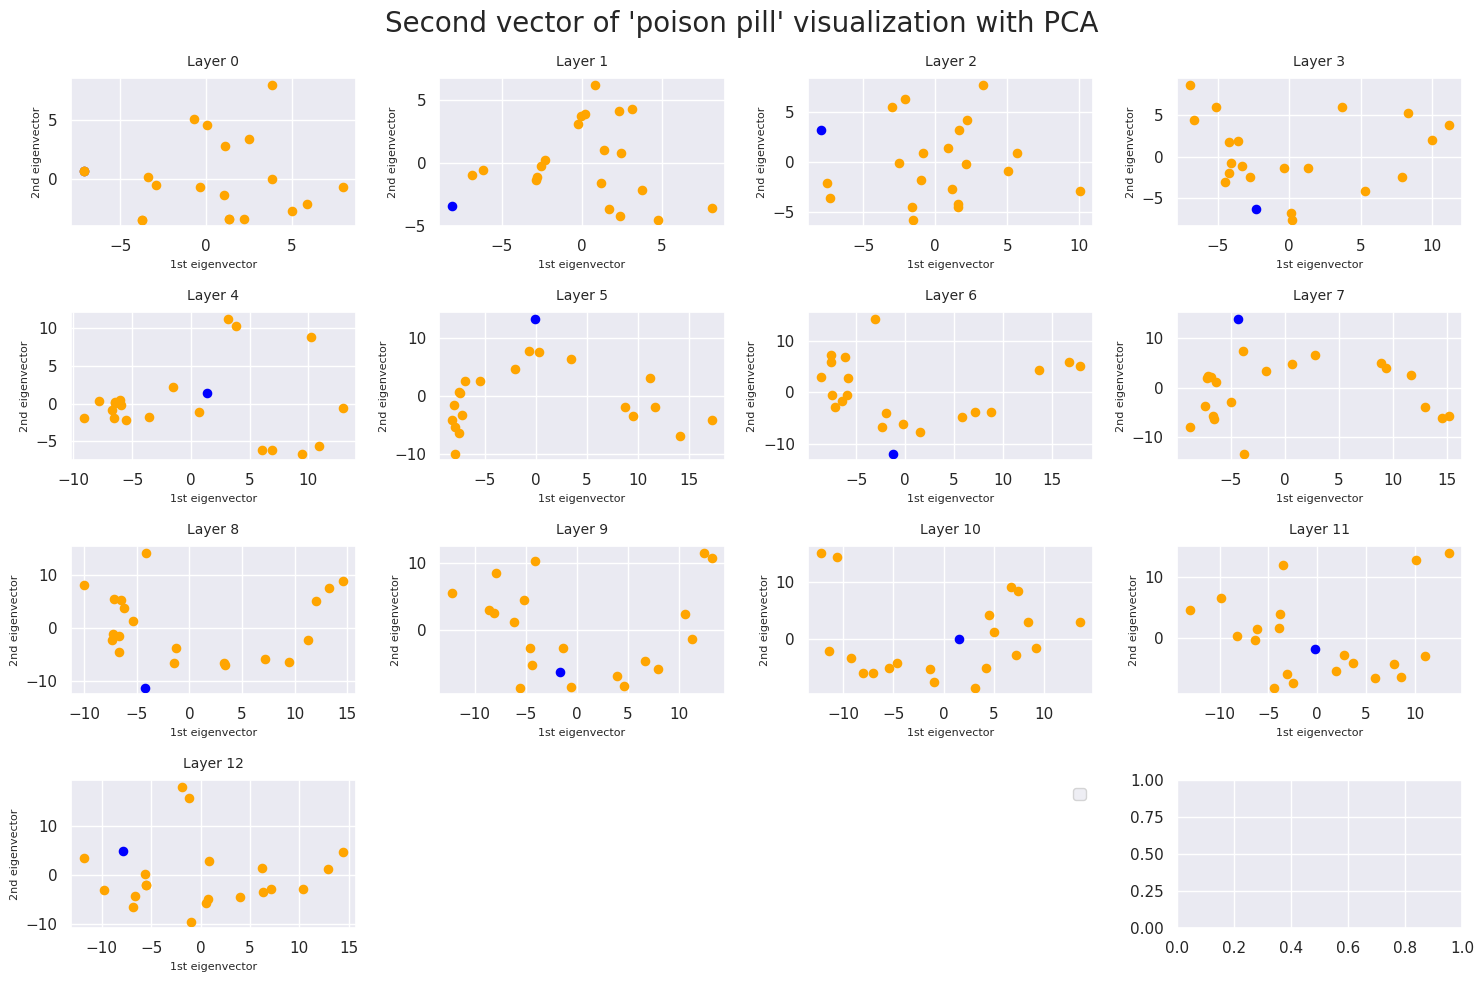

In [ ]:
mwe= "poison pill"
embed_id=1
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

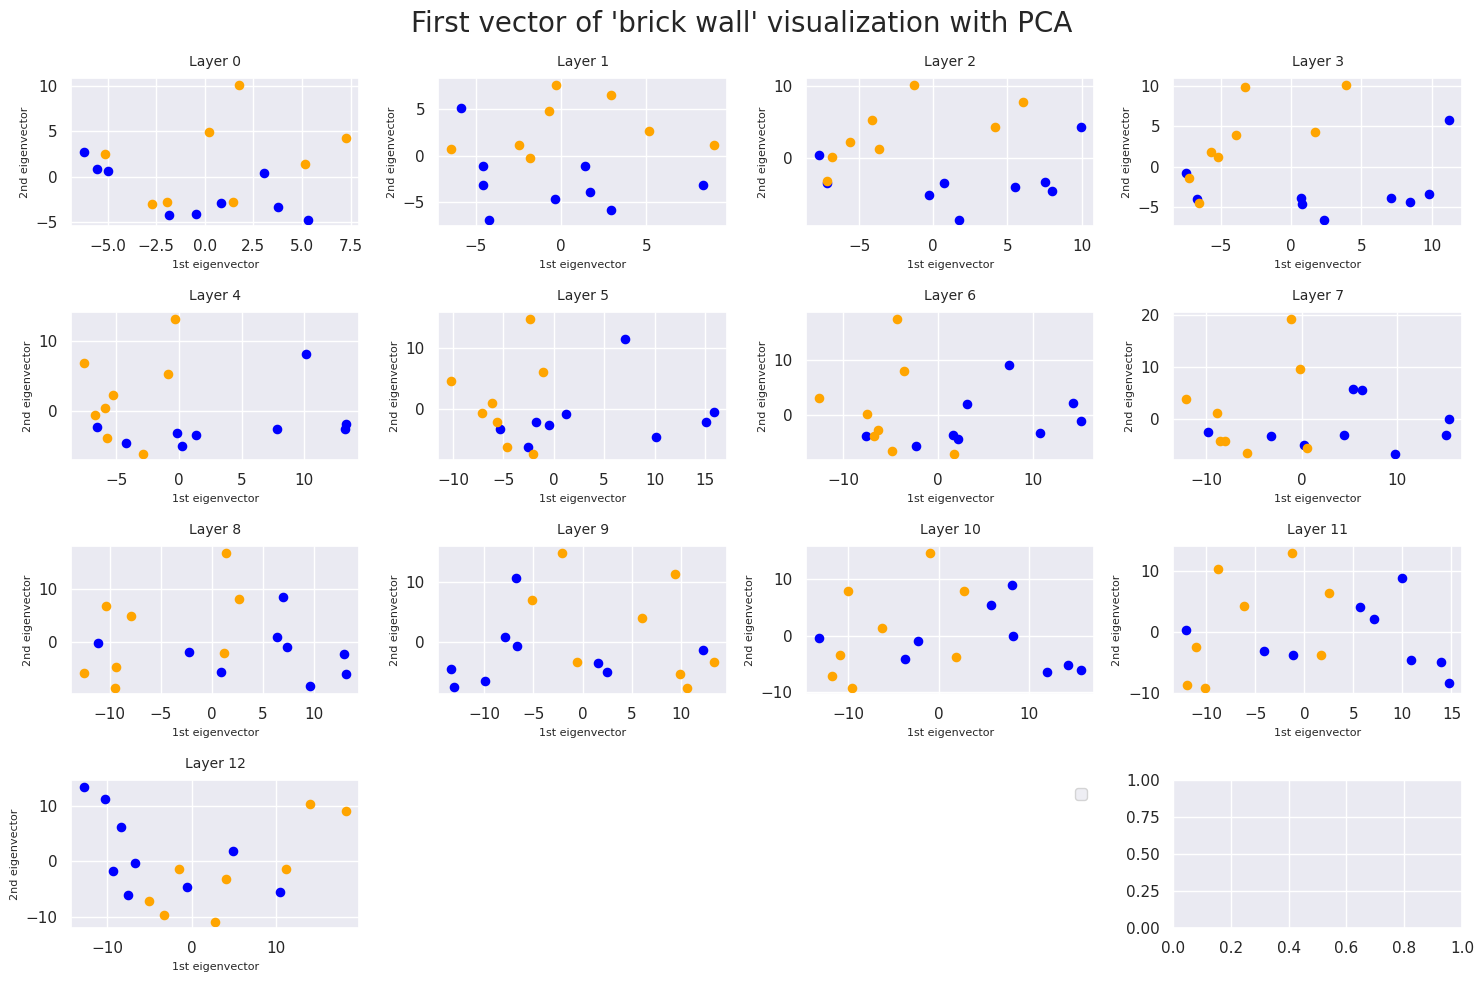

In [ ]:
mwe= "brick wall"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

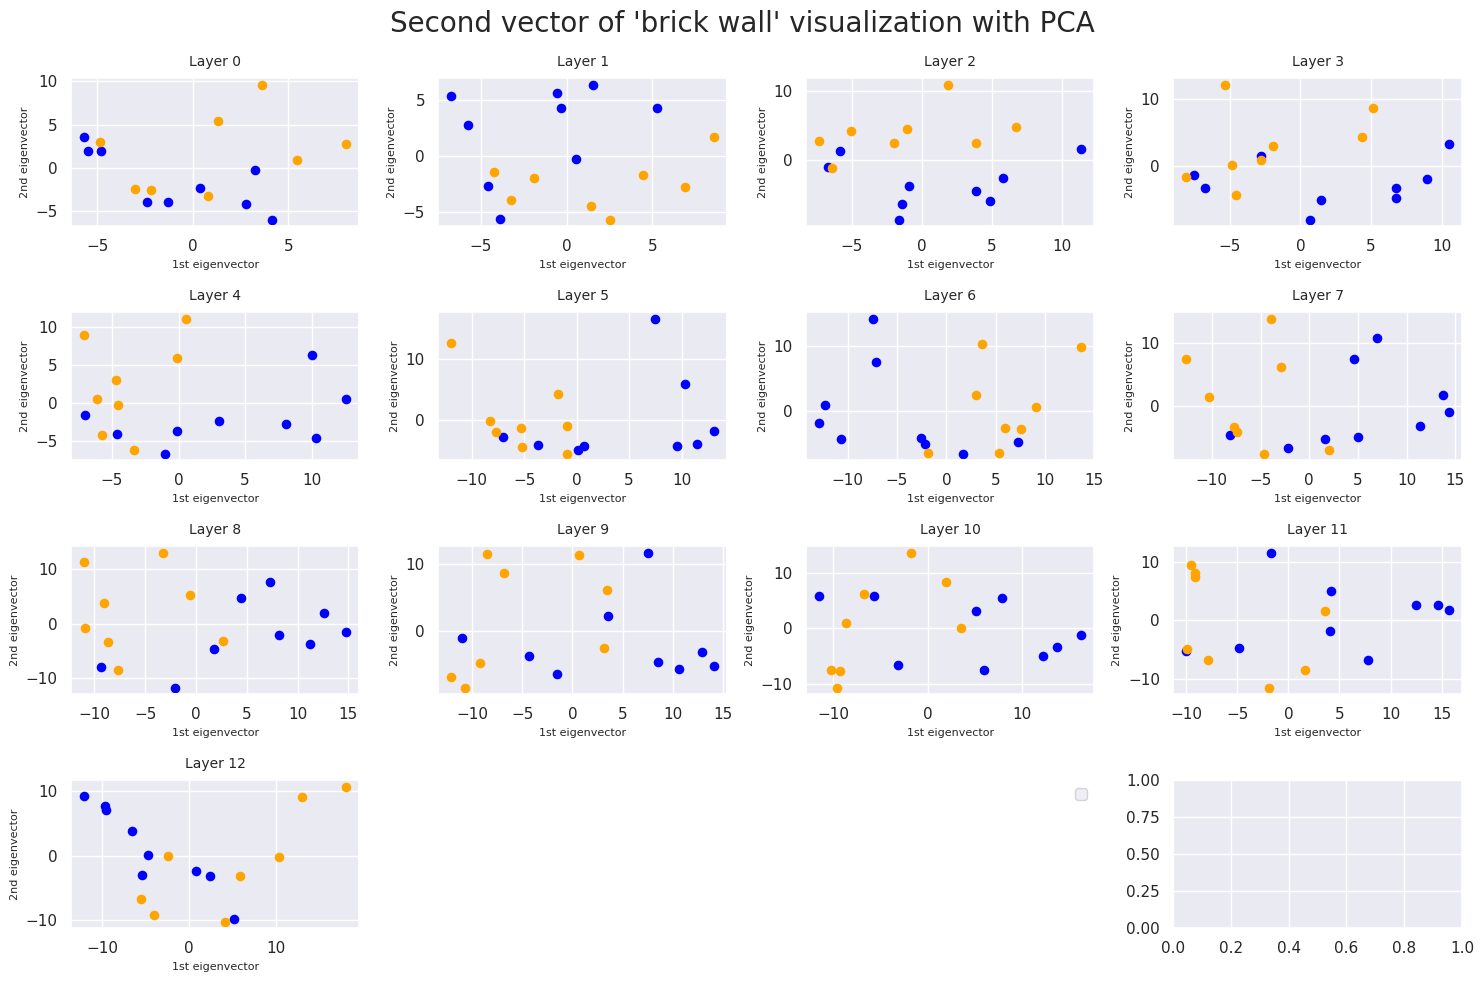

In [ ]:
mwe= "brick wall"
embed_id=1
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

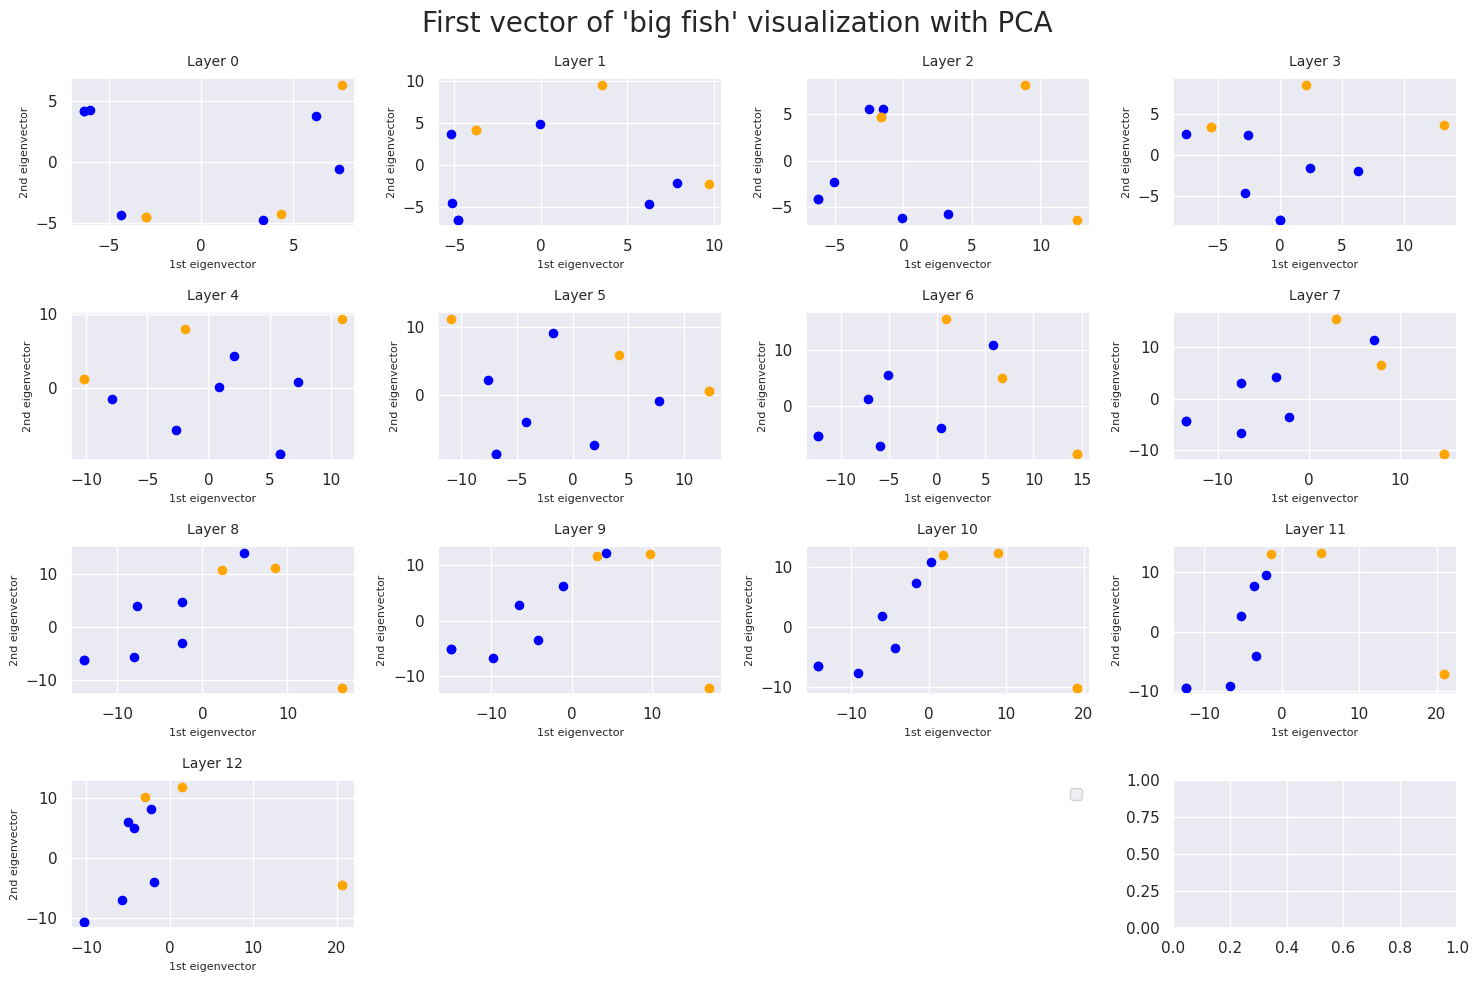

In [ ]:
mwe= "big fish"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

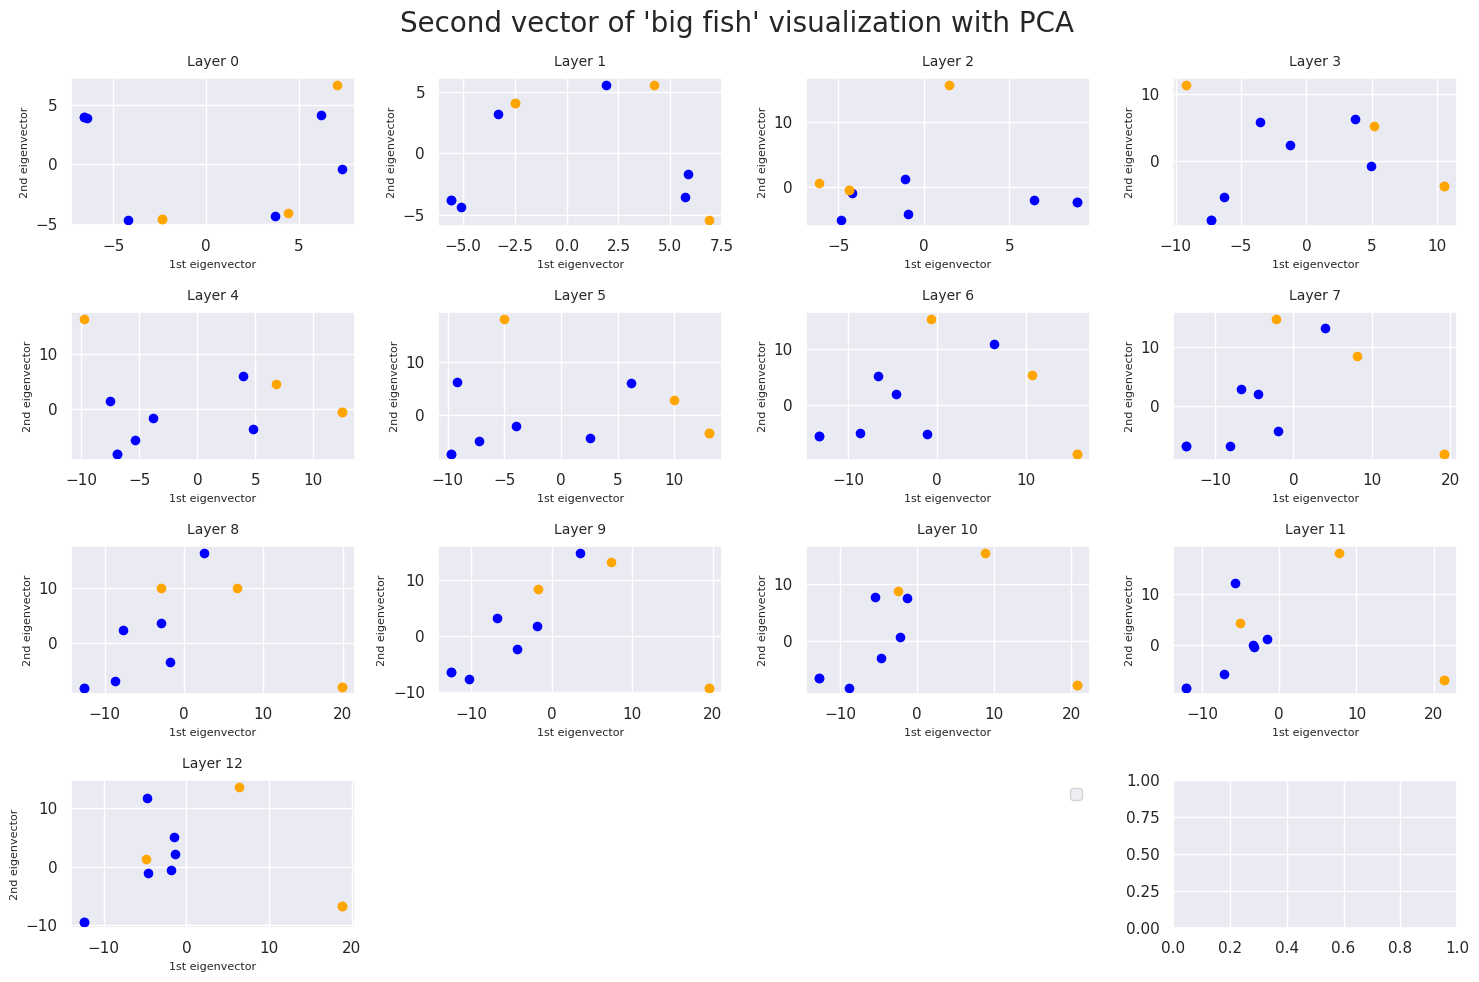

In [ ]:
mwe= "big fish"
embed_id=1
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

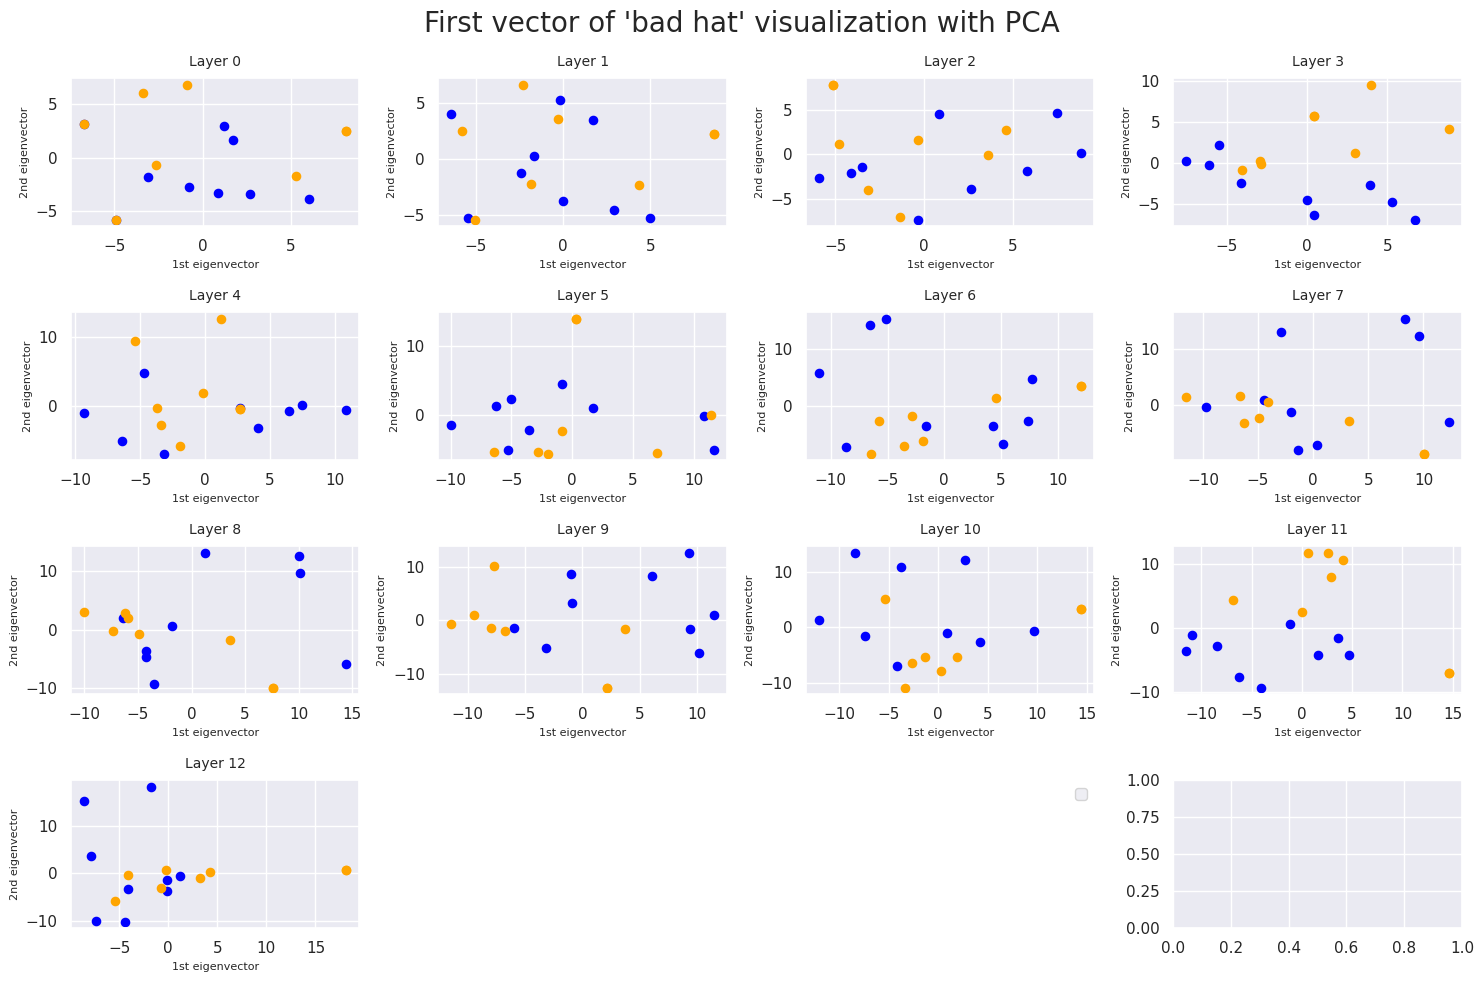

In [ ]:
mwe= "bad hat"
embed_id=0
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

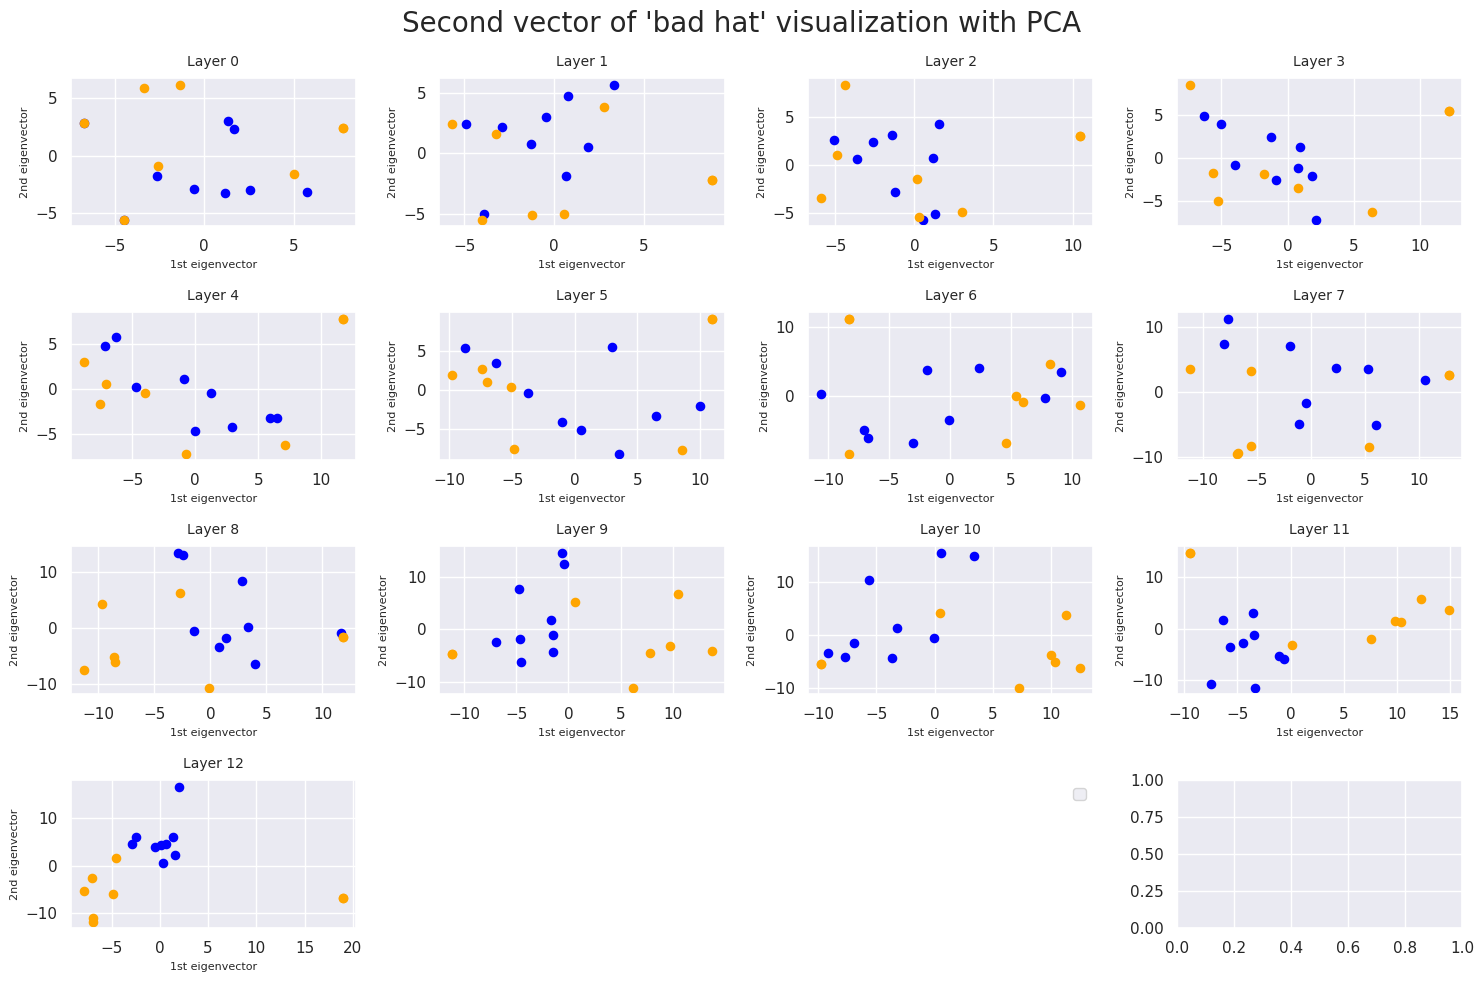

In [ ]:
mwe= "bad hat"
embed_id=1
plt.figure(figsize=(15, 10))  

for layer_id in range(0, 13):
    plt.subplot(4, 4, layer_id+1)
    vizualize_one_mwe_embedding(mwe, data_df, layer_id=layer_id, batch_size=32, normalize=True, print_ignored=False, embed_id=embed_id, plot_title= f"Layer {layer_id}", title_size=10, label_size=8, dot_size=35, legend_slot=15)

plt.suptitle(f"{'First' if embed_id == 0 else 'Second'} vector of '{mwe}' visualization with PCA", fontsize=20, y=0.98)
plt.savefig(f"../results/plots/'{mwe}'[{embed_id}] visualization with PCA.png")
plt.tight_layout()
plt.show()